# IoU and Dice Score Visualization

This notebook visualizes IoU and Dice scores for video frames from surgical procedure analysis.

In [15]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [16]:
# Load all JSON files starting with LapChol or V
def load_video_results():
    """Load all video result JSON files."""
    current_dir = Path('.')
    video_data = {}
    
    for json_file in current_dir.glob('*.json'):
        filename = json_file.name
        # Only process files starting with LapChol or V
        if filename.startswith('LapChol') or (filename.startswith('V') and filename != 'combined_results.json'):
            with open(json_file, 'r') as f:
                data = json.load(f)
                # Extract video name (remove _results.json)
                video_name = filename.replace('_results.json', '')
                video_data[video_name] = data
    
    return video_data

video_data = load_video_results()
print(f"Loaded {len(video_data)} video result files")
print("Videos:", list(video_data.keys()))

Loaded 27 video result files
Videos: ['LapChol_Case_0002_02', 'V15_Trimmed', 'LapChol_Case_0016_01', 'LapChol_Case_0002_03', 'V11-Trimmed', 'LapChol_Case_0007_01', 'V7-Trimmed', 'LapChol_Case_0020_02', 'V2_Trimmed', 'V14_Trimmed', 'LapChol_Case_0012_03', 'LapChol_Case_0012_04', 'LapChol_Case_0020_03', 'LapChol_Case_0001_04', 'LapChol_Case_0001_03', 'LapChol_Case_0018_11', 'V17_Trimmed', 'LapChol_Case_0001_05', 'LapChol_Case_0018_10', 'V18_Trimmed', 'LapChol_Case_0019_02', 'LapChol_Case_0023_04', 'LapChol_Case_0023_03', 'LapChol_Case_0007_03', 'LapChol_Case_0019_03', 'V5_Trimmed', 'LapChol_Case_0007_02']


In [17]:
def extract_nonzero_metrics(results):
    """Extract frame numbers and non-zero IoU/Dice scores from detailed results."""
    frames = []
    ious = []
    dices = []
    
    for result in results['detailed_results']:
        iou = result.get('iou', 0)
        dice = result.get('dice', 0)
        frame = result.get('frame', 0)
        
        # Only include frames with non-zero values
        if iou > 0 or dice > 0:
            frames.append(frame)
            ious.append(iou)
            dices.append(dice)
    
    return frames, ious, dices

## Individual Video Plots

Showing IoU and Dice scores for each frame in each video (excluding zero values).

Saved: LapChol_Case_0001_03_metrics.png (11 non-zero frames)


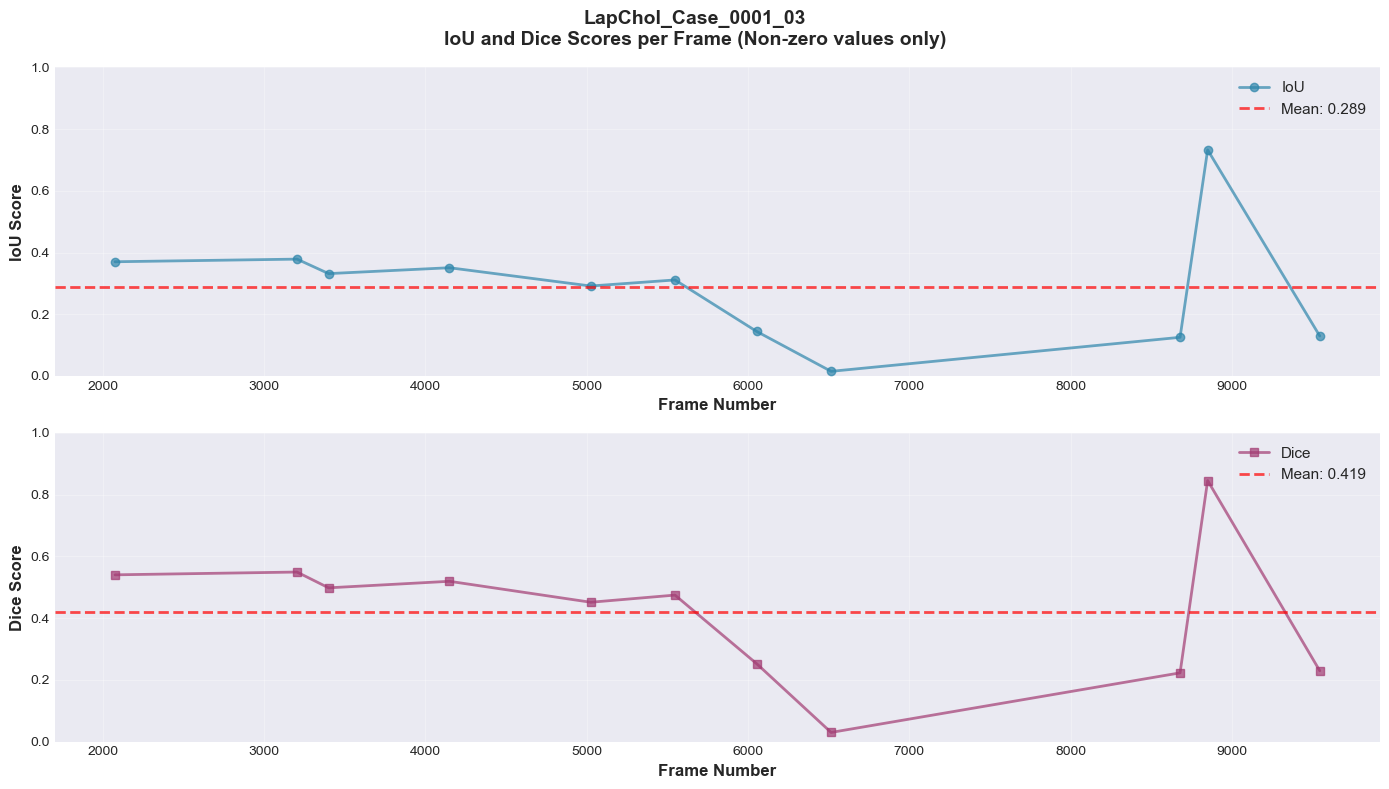

Saved: LapChol_Case_0001_04_metrics.png (19 non-zero frames)


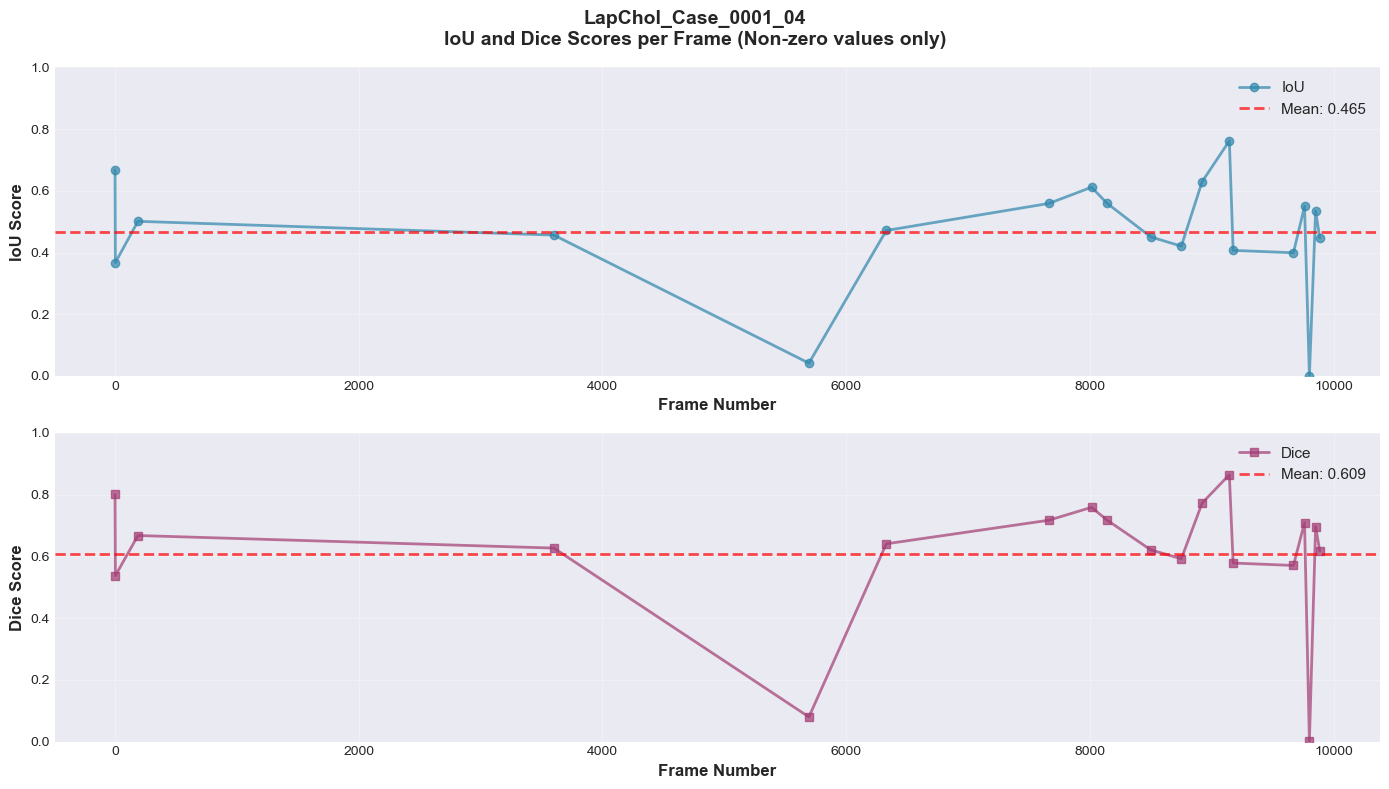

Saved: LapChol_Case_0001_05_metrics.png (35 non-zero frames)


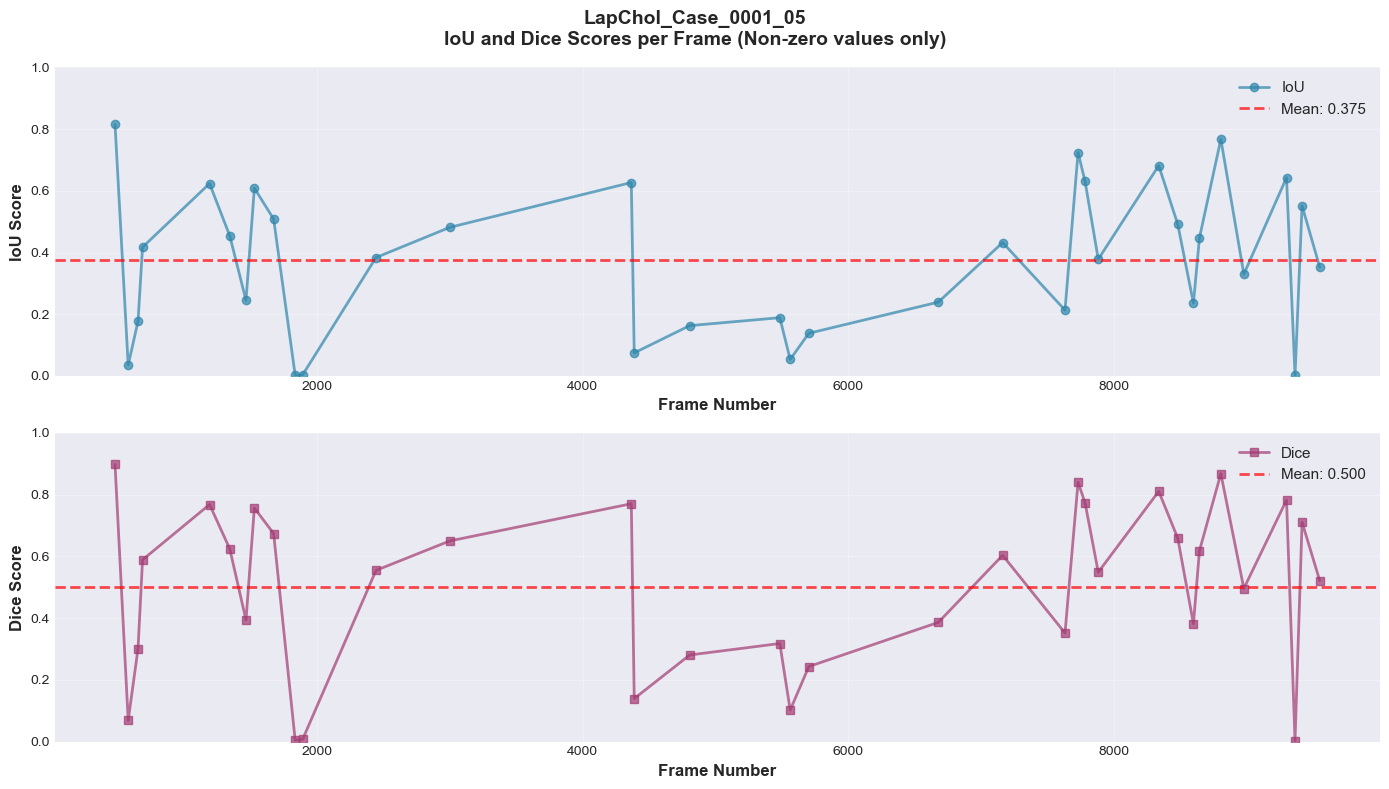

Saved: LapChol_Case_0002_02_metrics.png (8 non-zero frames)


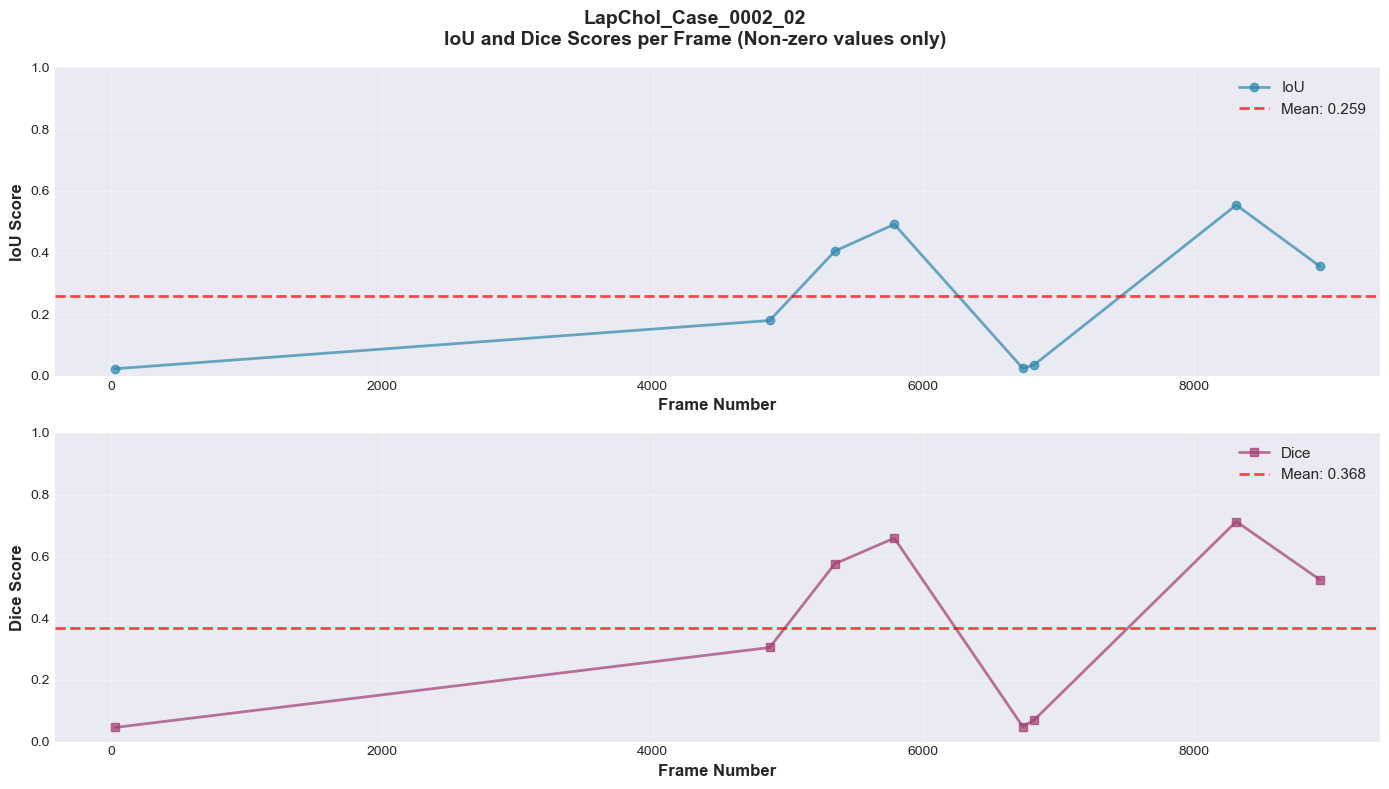

Saved: LapChol_Case_0002_03_metrics.png (3 non-zero frames)


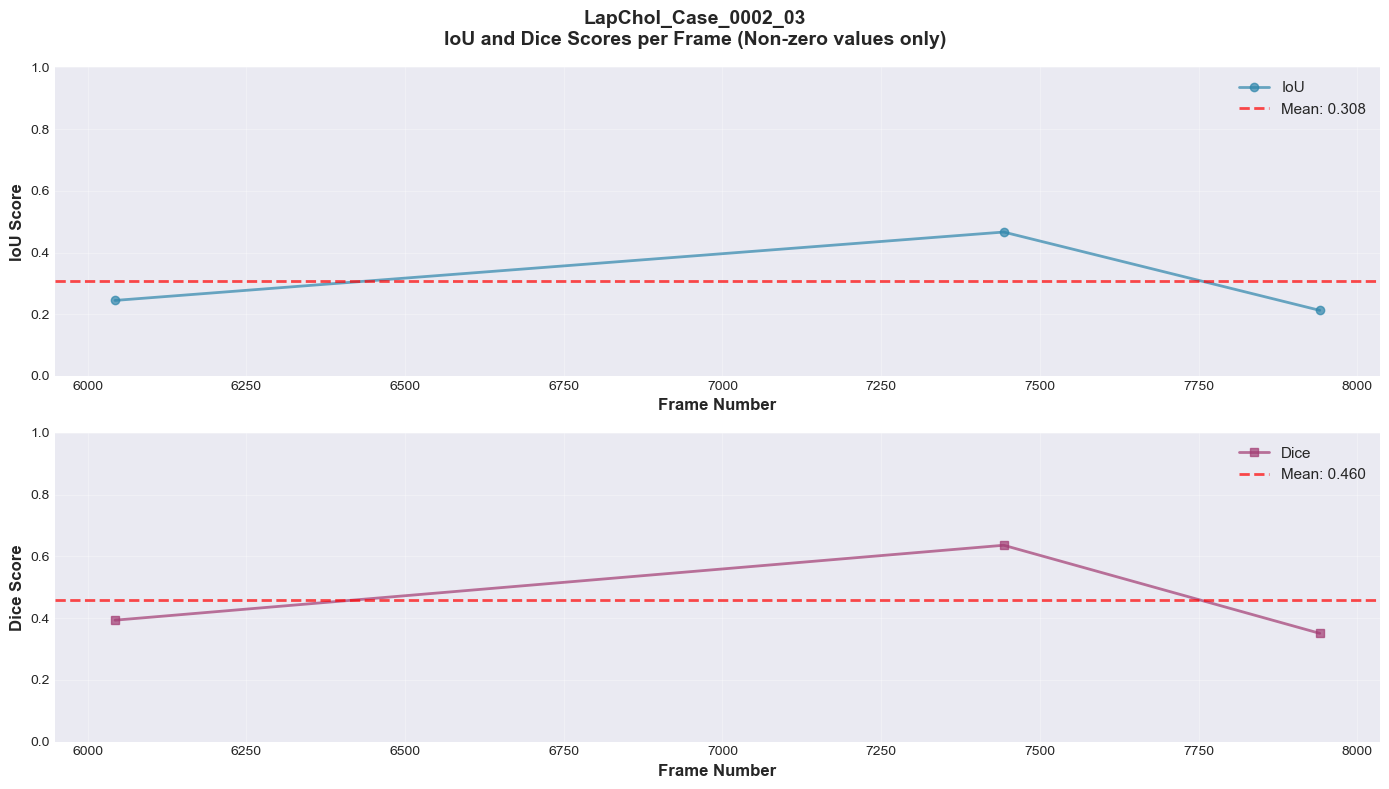

Saved: LapChol_Case_0007_01_metrics.png (20 non-zero frames)


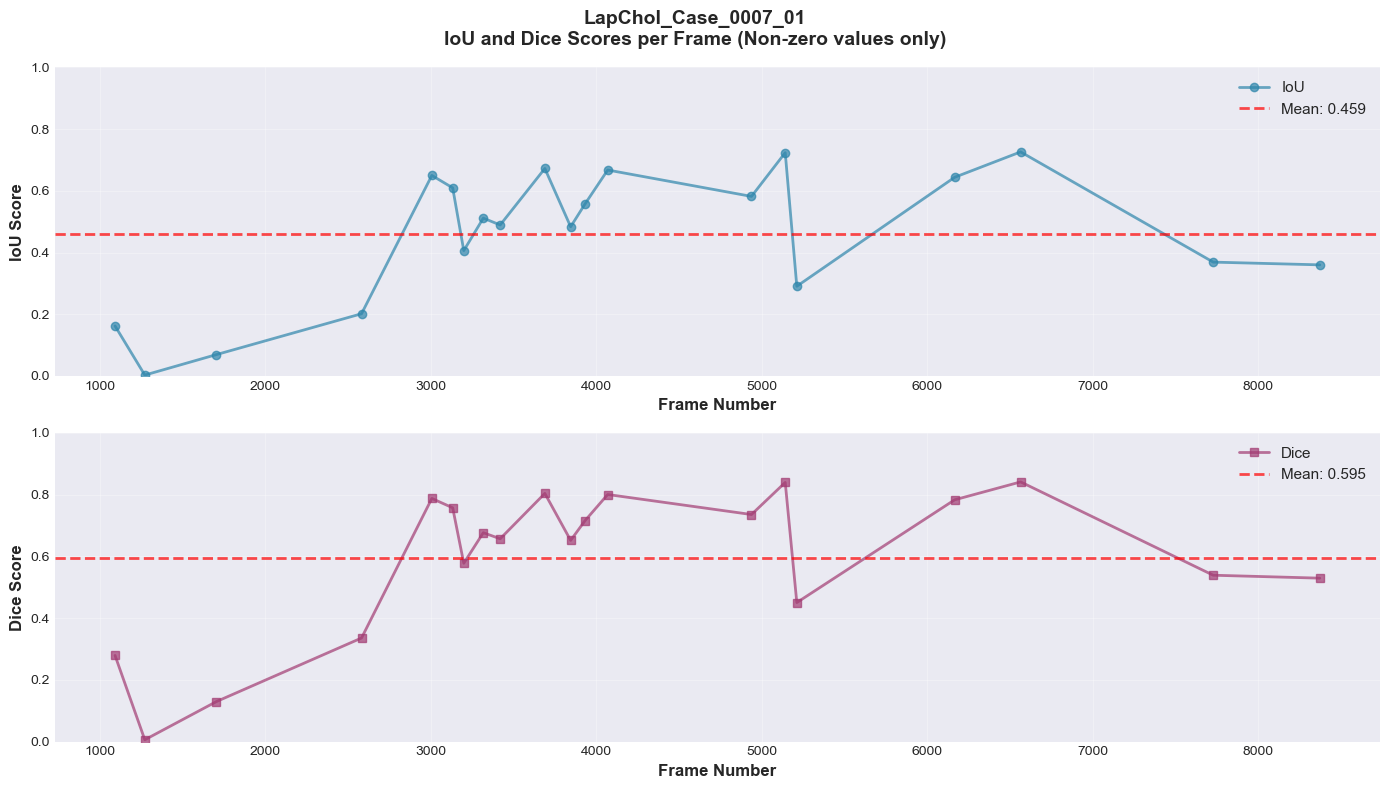

Saved: LapChol_Case_0007_02_metrics.png (20 non-zero frames)


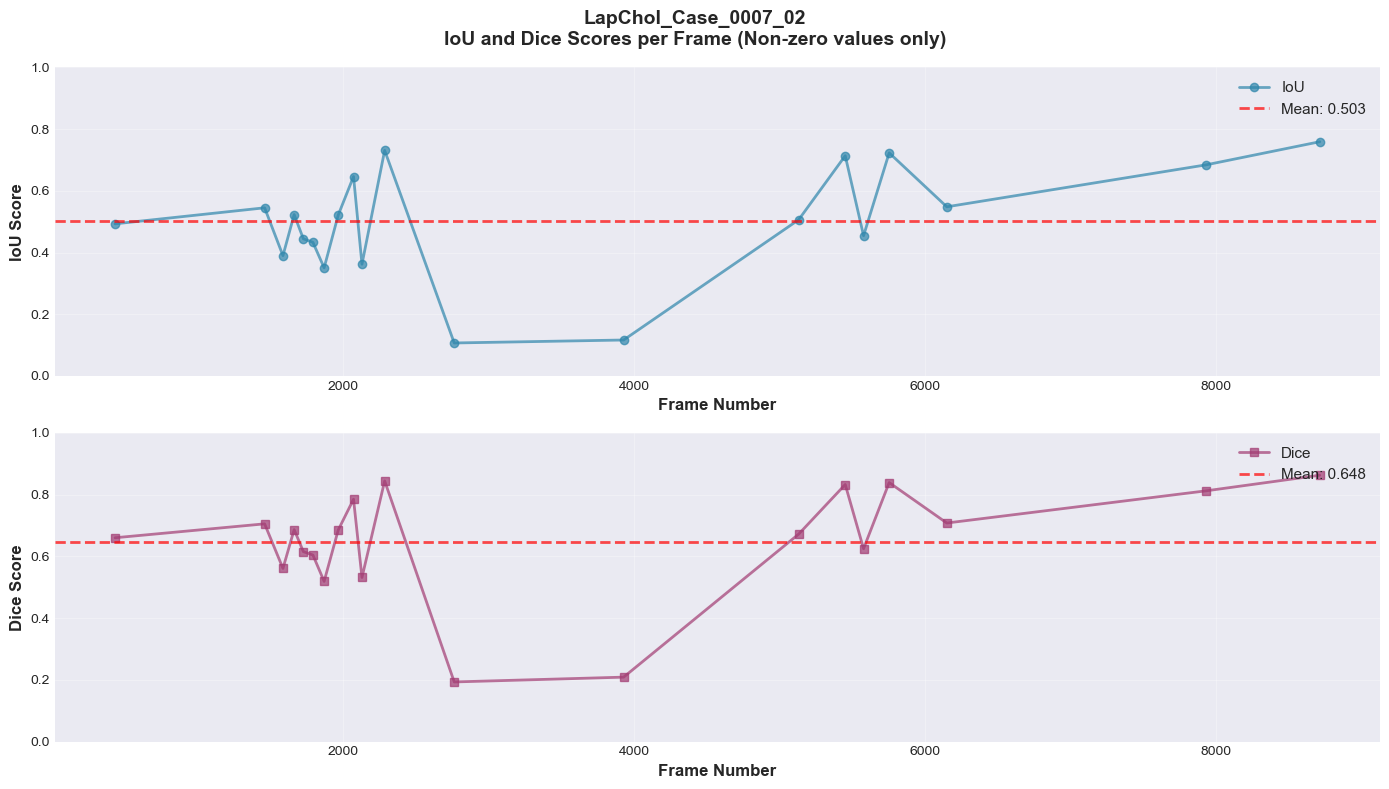

Saved: LapChol_Case_0007_03_metrics.png (28 non-zero frames)


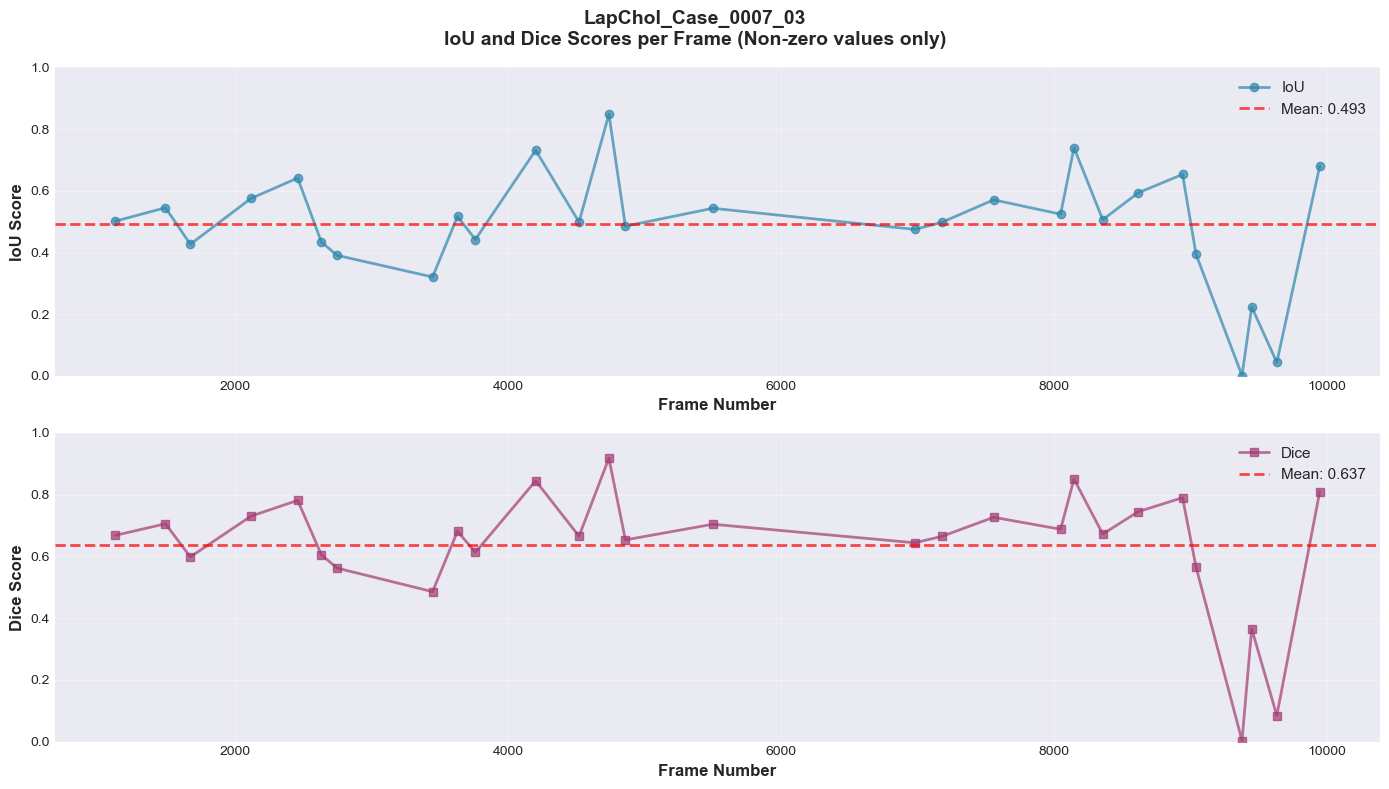

Saved: LapChol_Case_0012_03_metrics.png (16 non-zero frames)


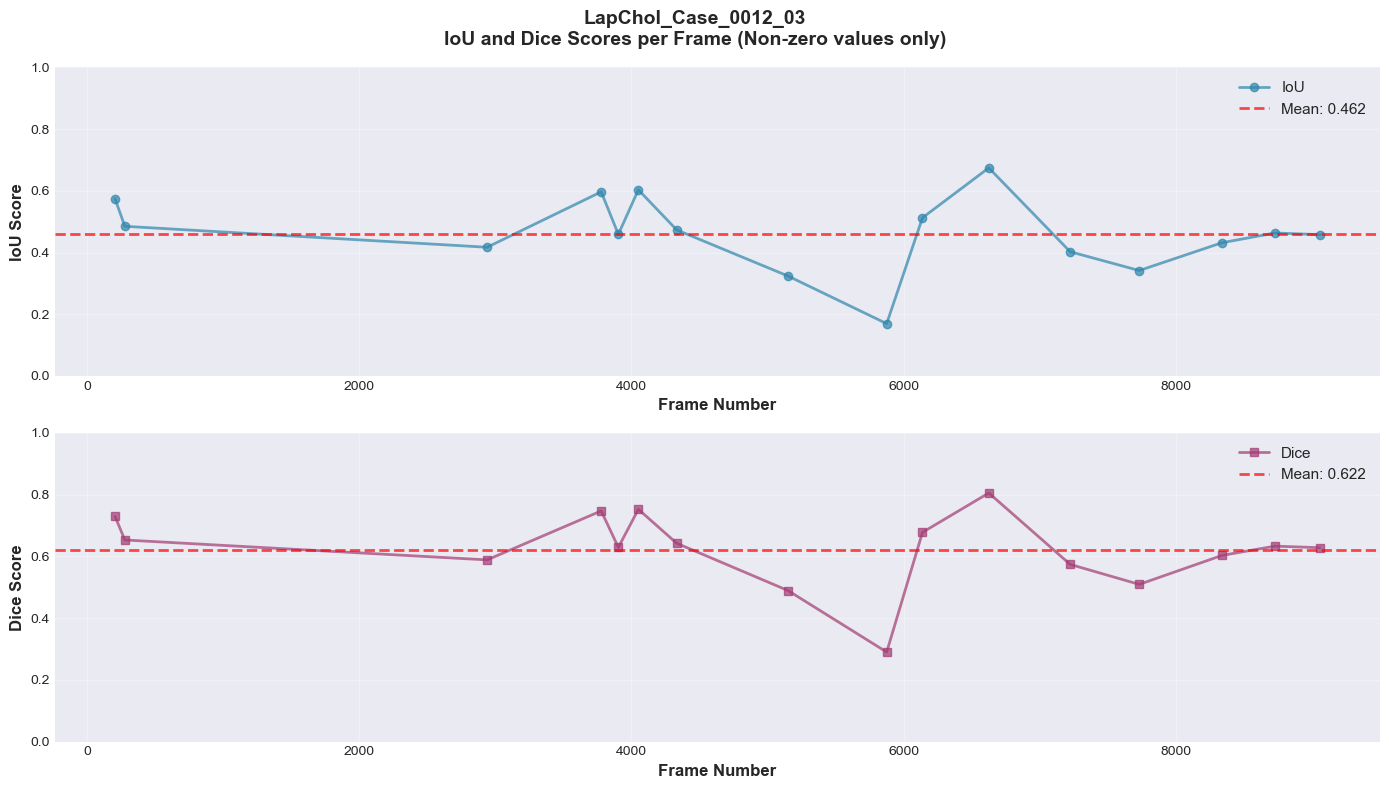

Saved: LapChol_Case_0012_04_metrics.png (11 non-zero frames)


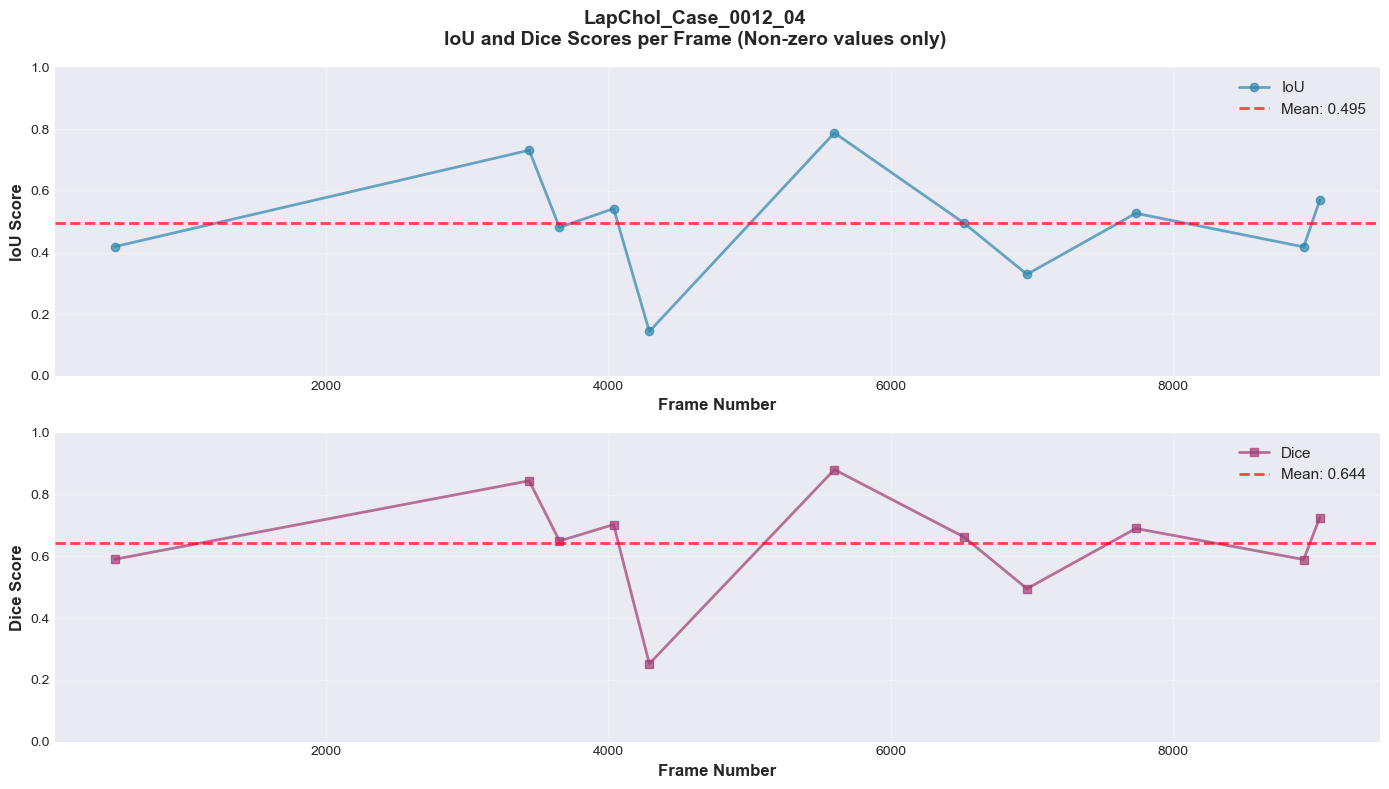

Saved: LapChol_Case_0016_01_metrics.png (32 non-zero frames)


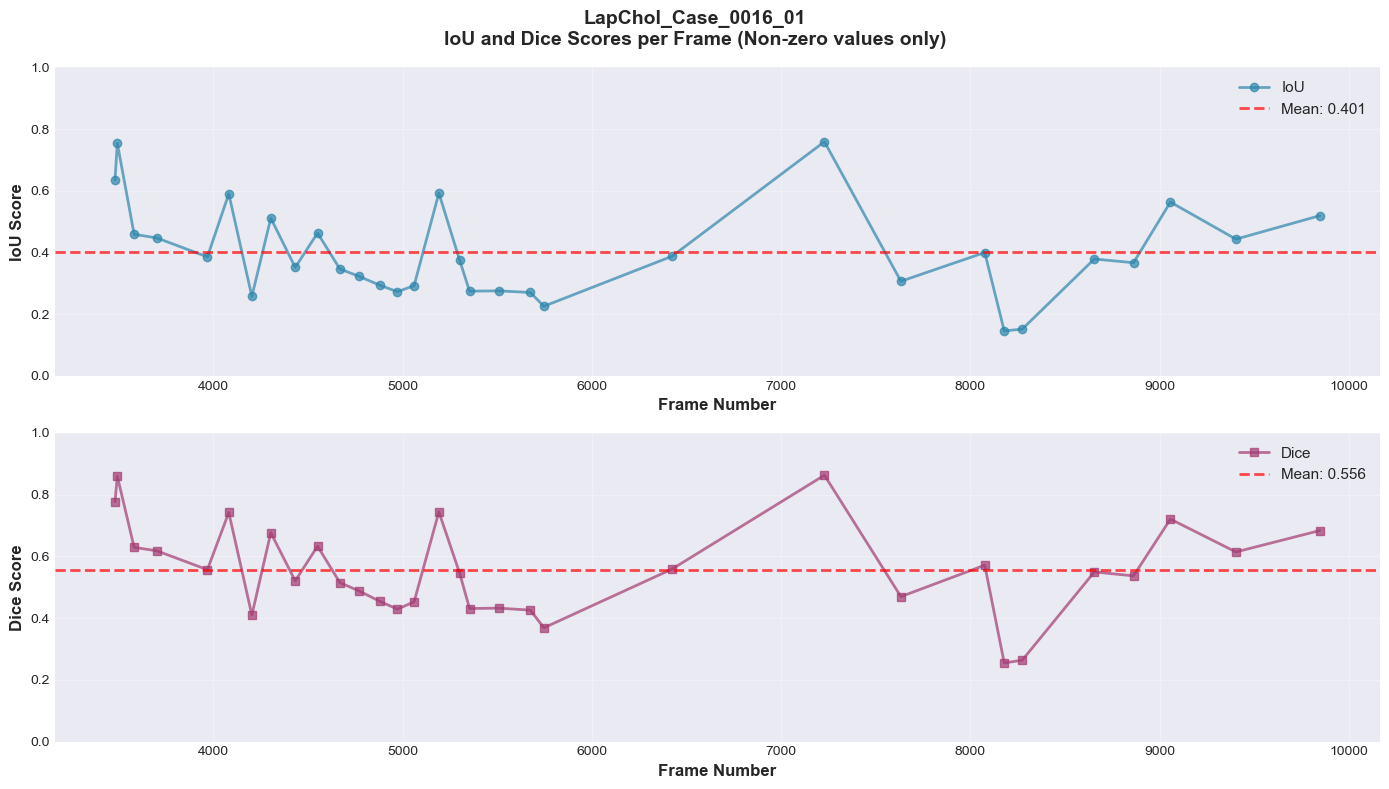

Saved: LapChol_Case_0018_10_metrics.png (14 non-zero frames)


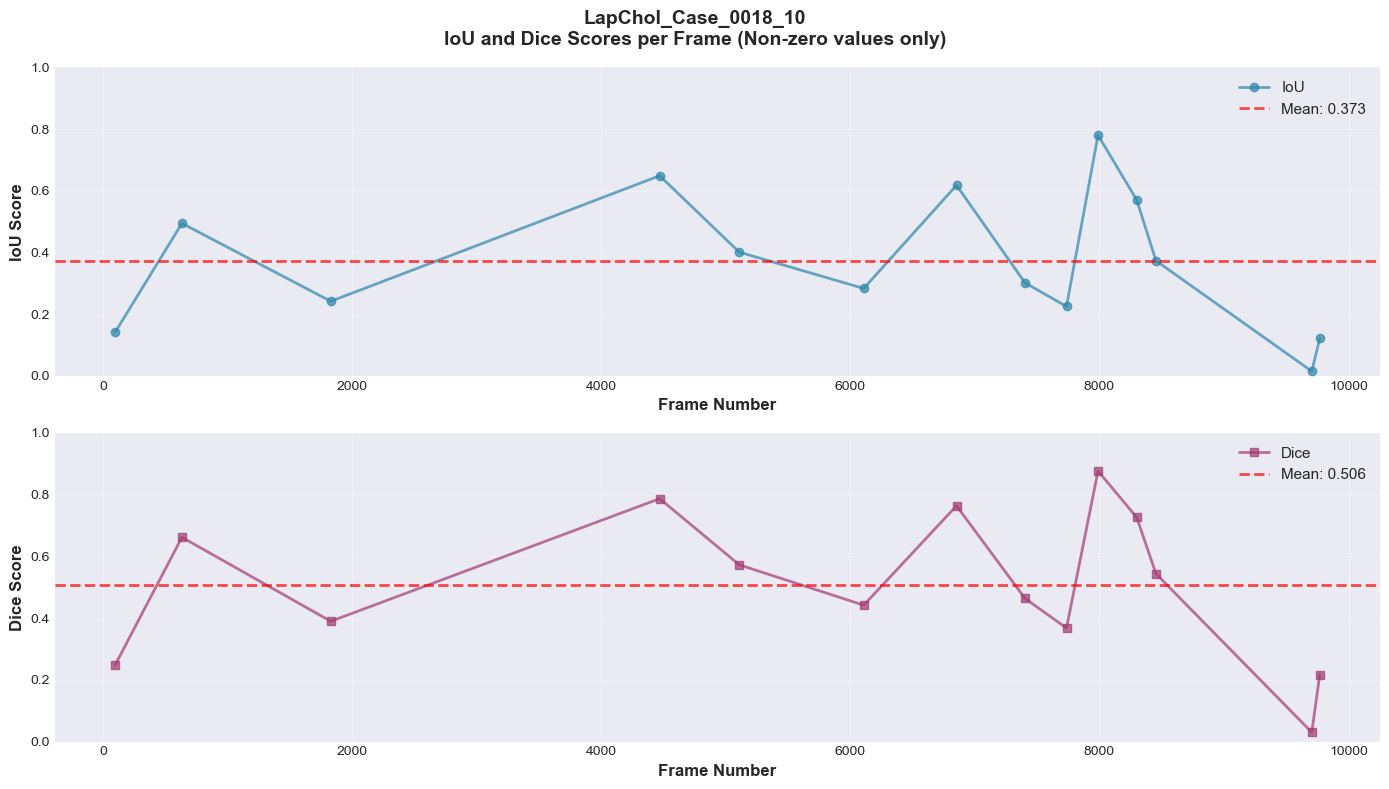

Saved: LapChol_Case_0018_11_metrics.png (10 non-zero frames)


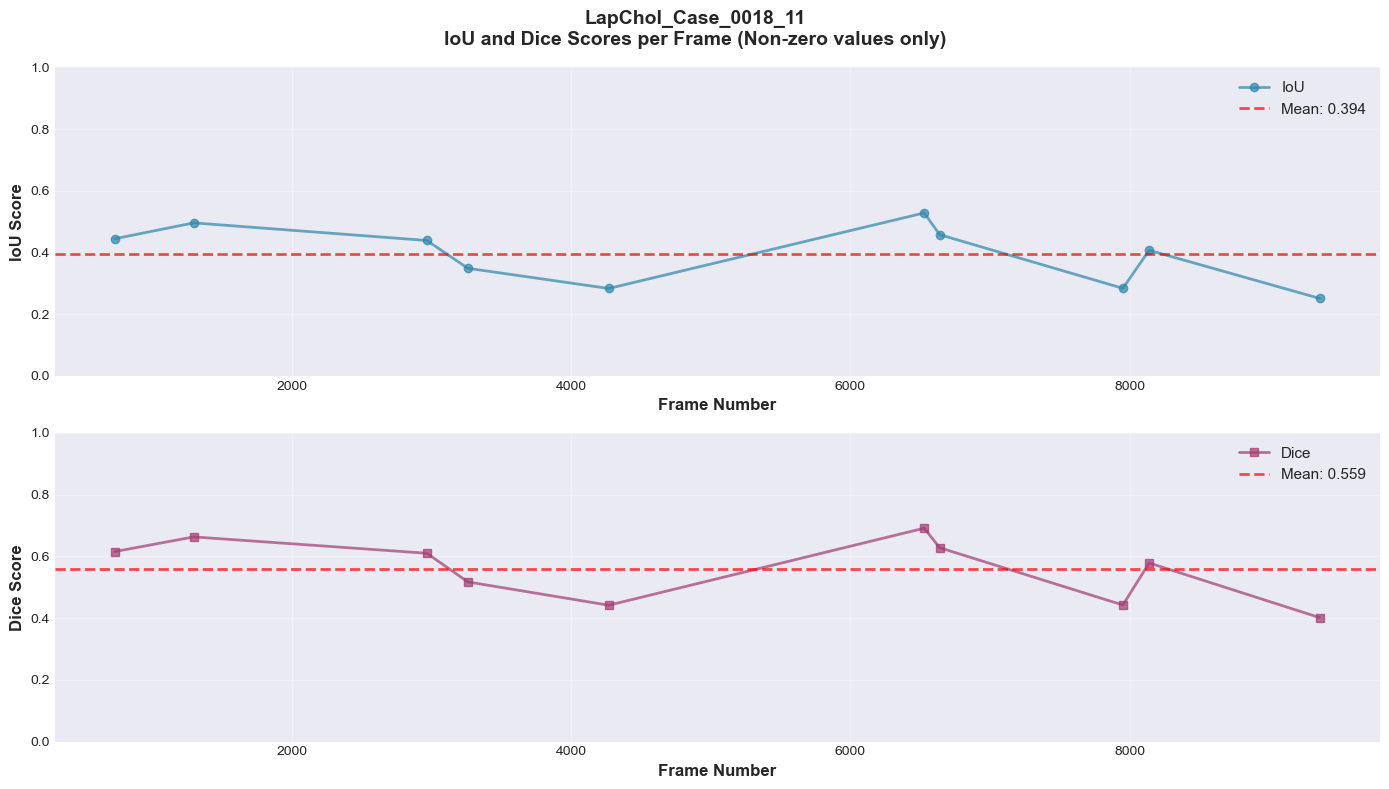

Saved: LapChol_Case_0019_02_metrics.png (4 non-zero frames)


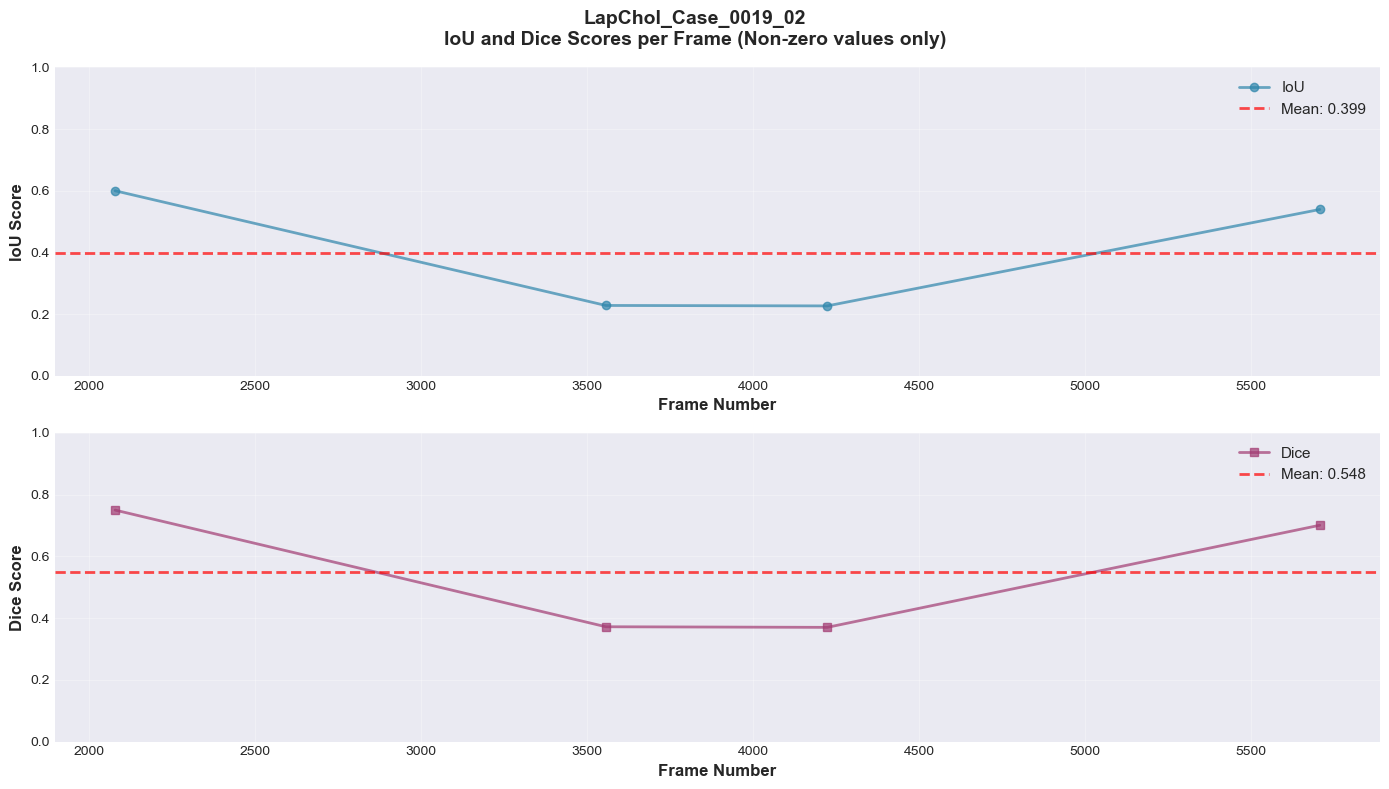

Saved: LapChol_Case_0019_03_metrics.png (4 non-zero frames)


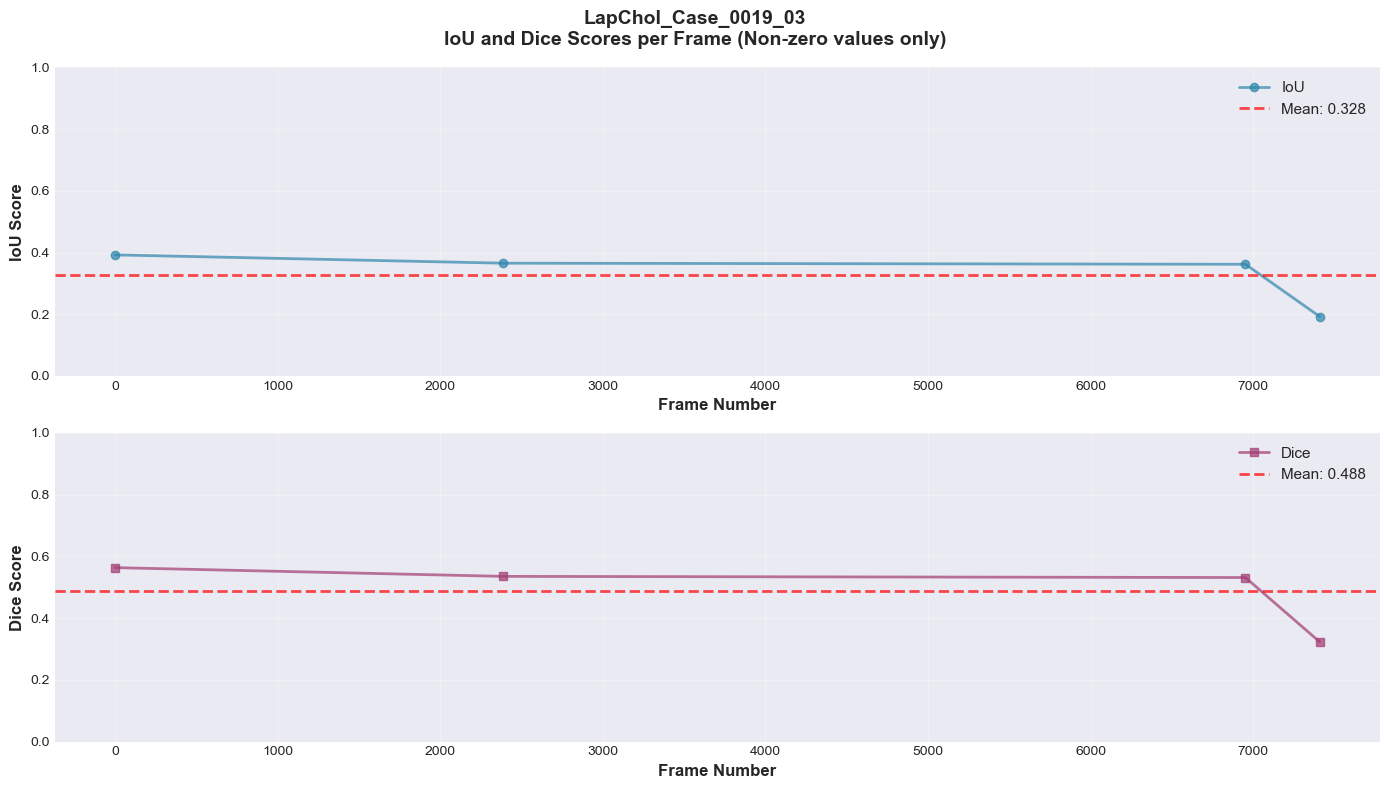

Saved: LapChol_Case_0020_02_metrics.png (18 non-zero frames)


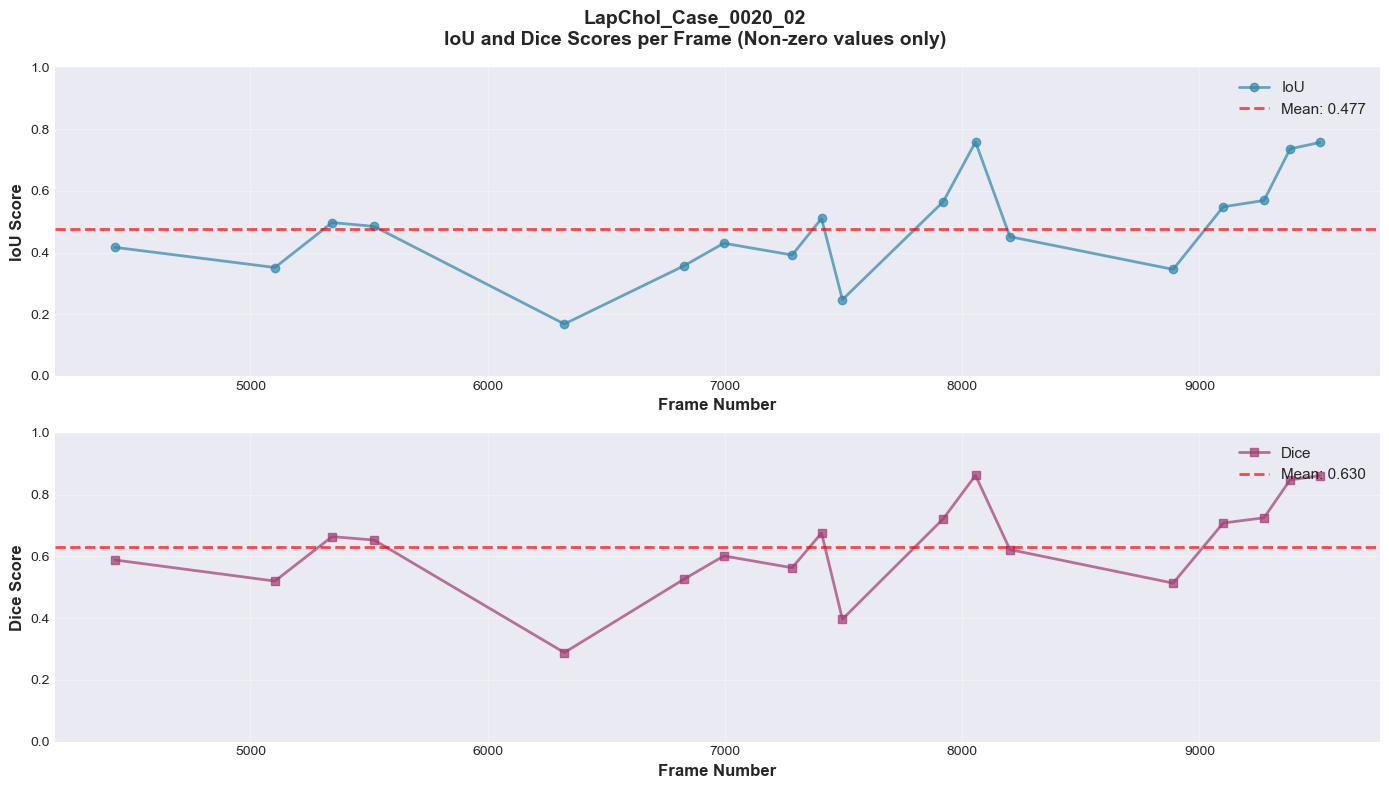

Saved: LapChol_Case_0020_03_metrics.png (26 non-zero frames)


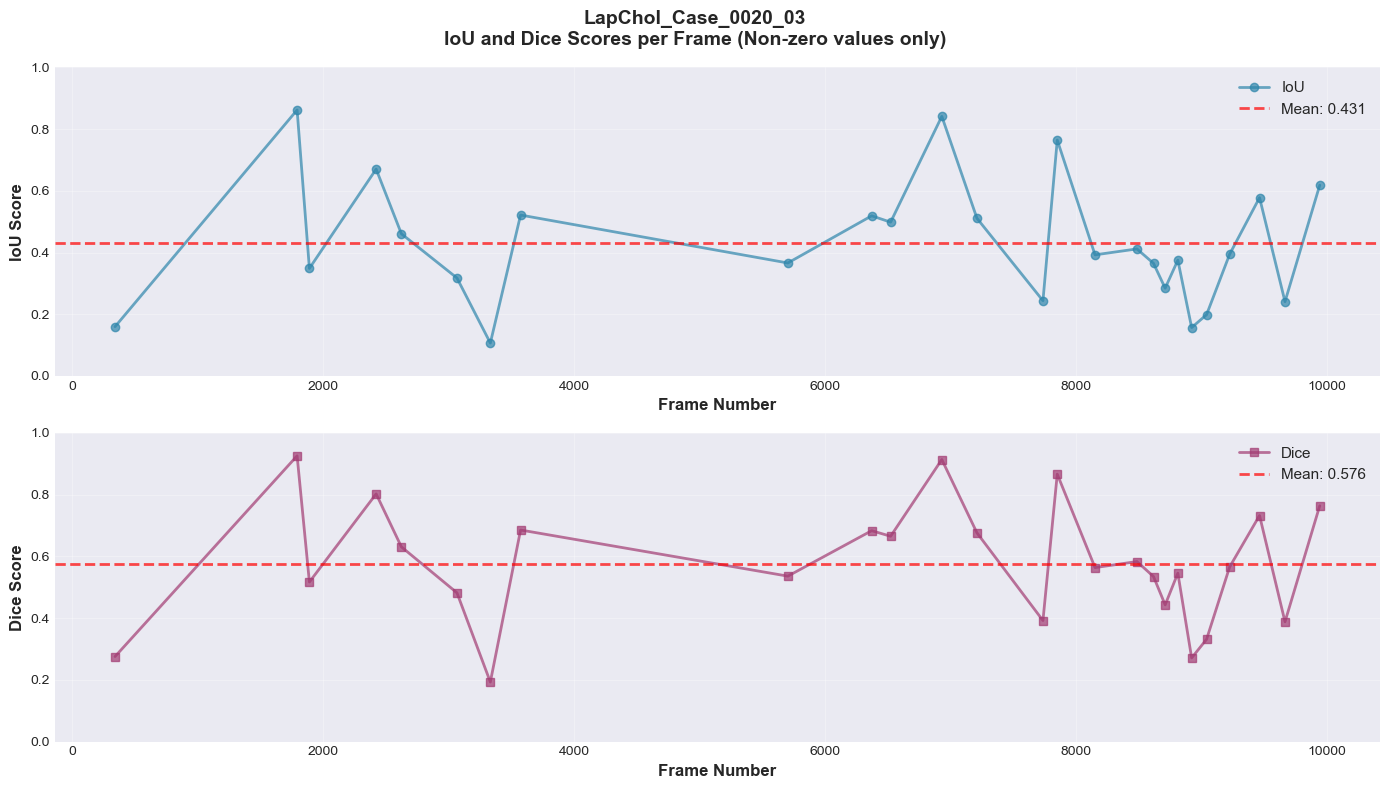

Saved: LapChol_Case_0023_03_metrics.png (22 non-zero frames)


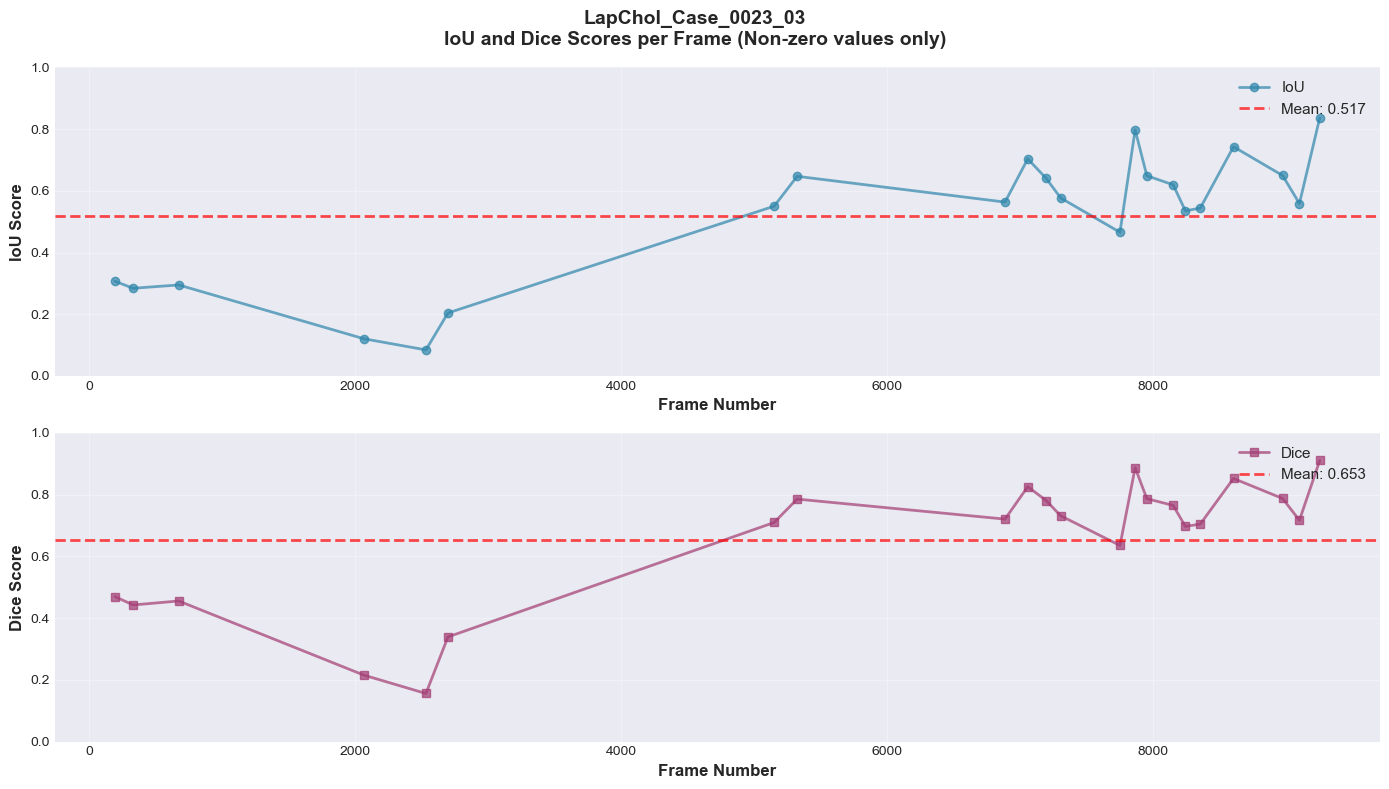

Saved: LapChol_Case_0023_04_metrics.png (14 non-zero frames)


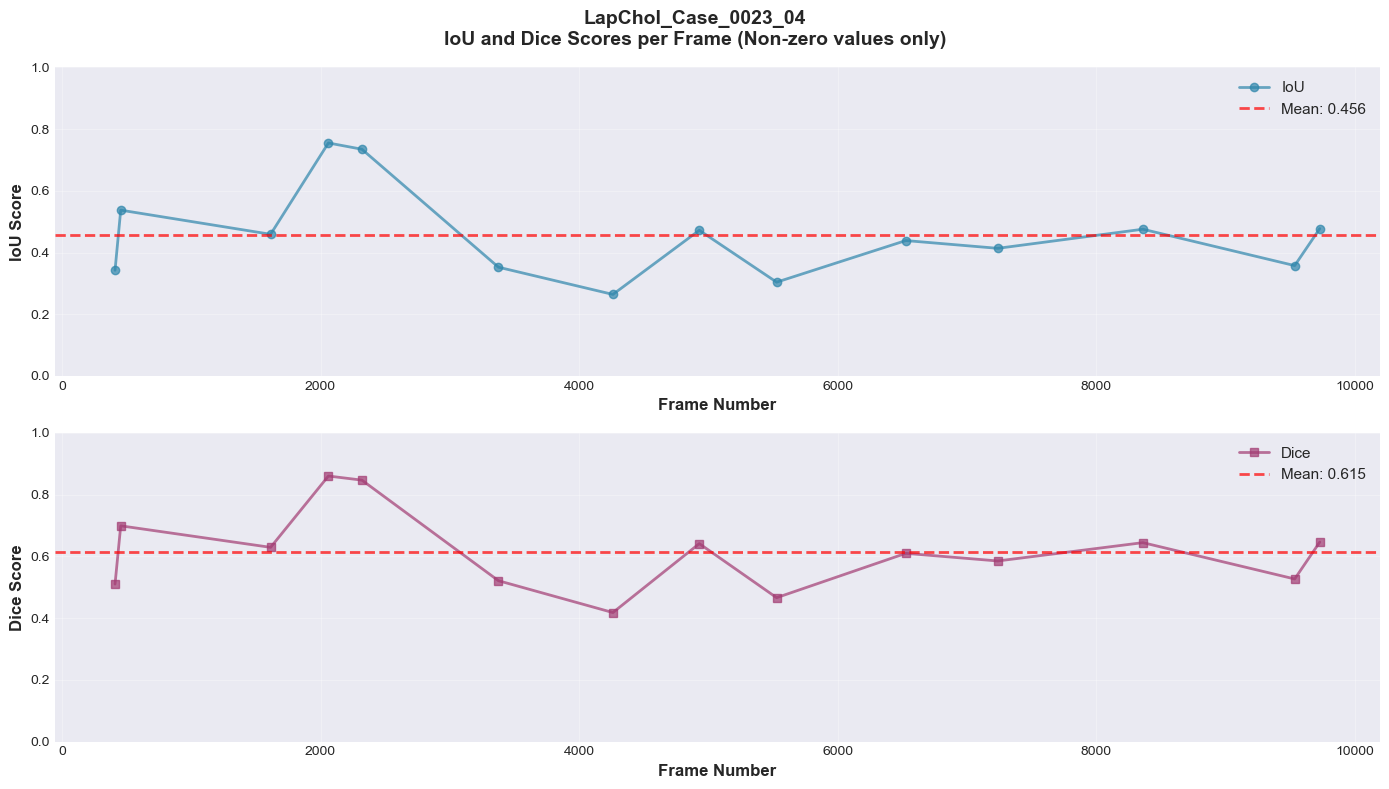

Saved: V11-Trimmed_metrics.png (2 non-zero frames)


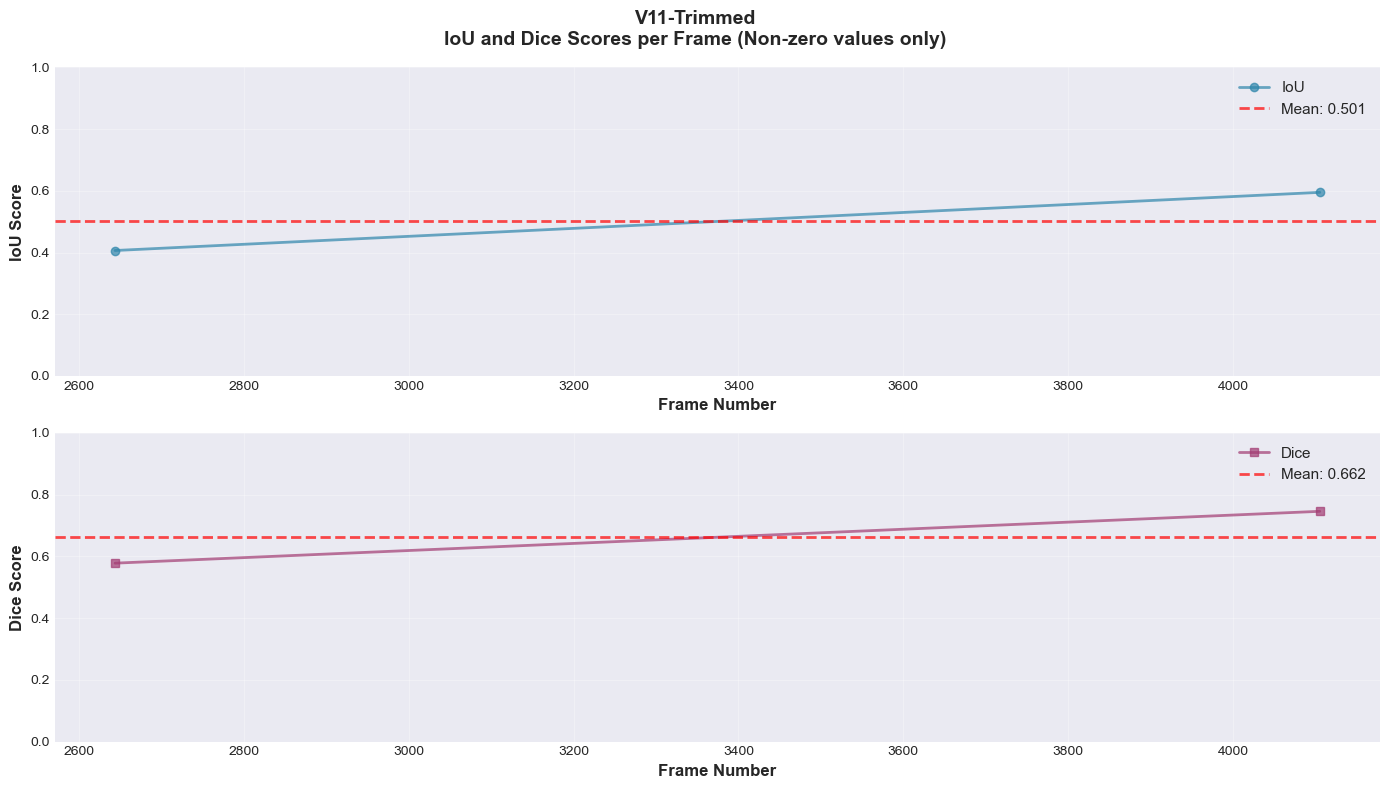

Saved: V14_Trimmed_metrics.png (7 non-zero frames)


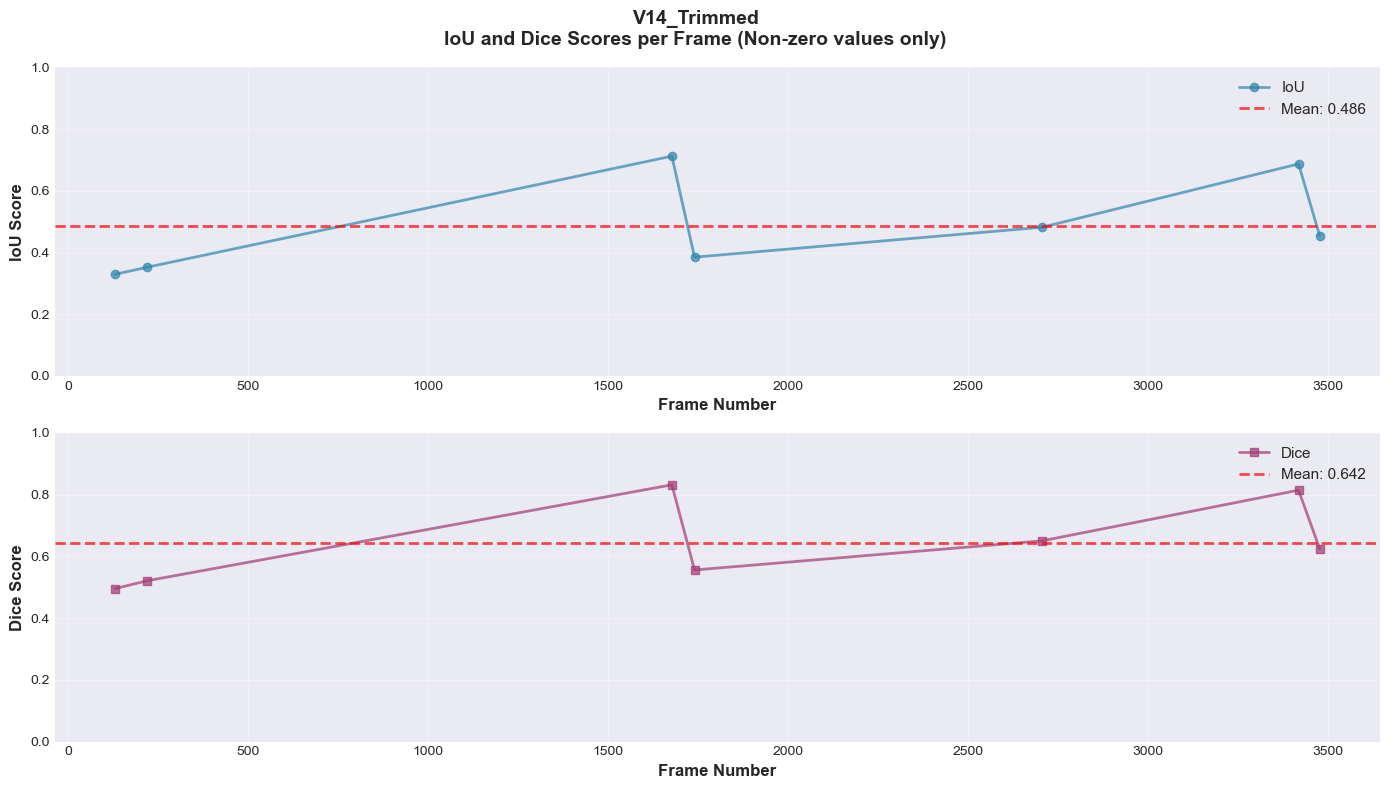

Saved: V15_Trimmed_metrics.png (2 non-zero frames)


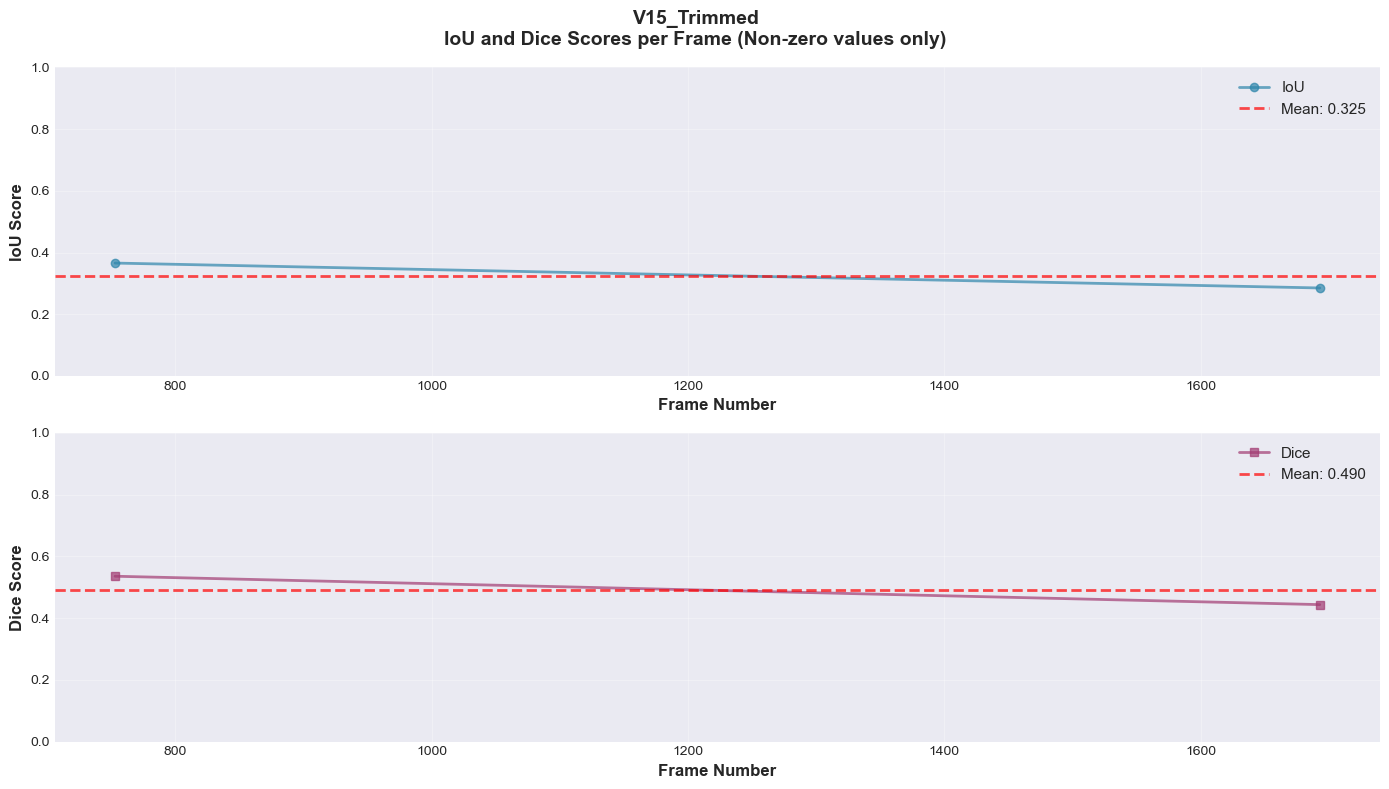

Saved: V17_Trimmed_metrics.png (2 non-zero frames)


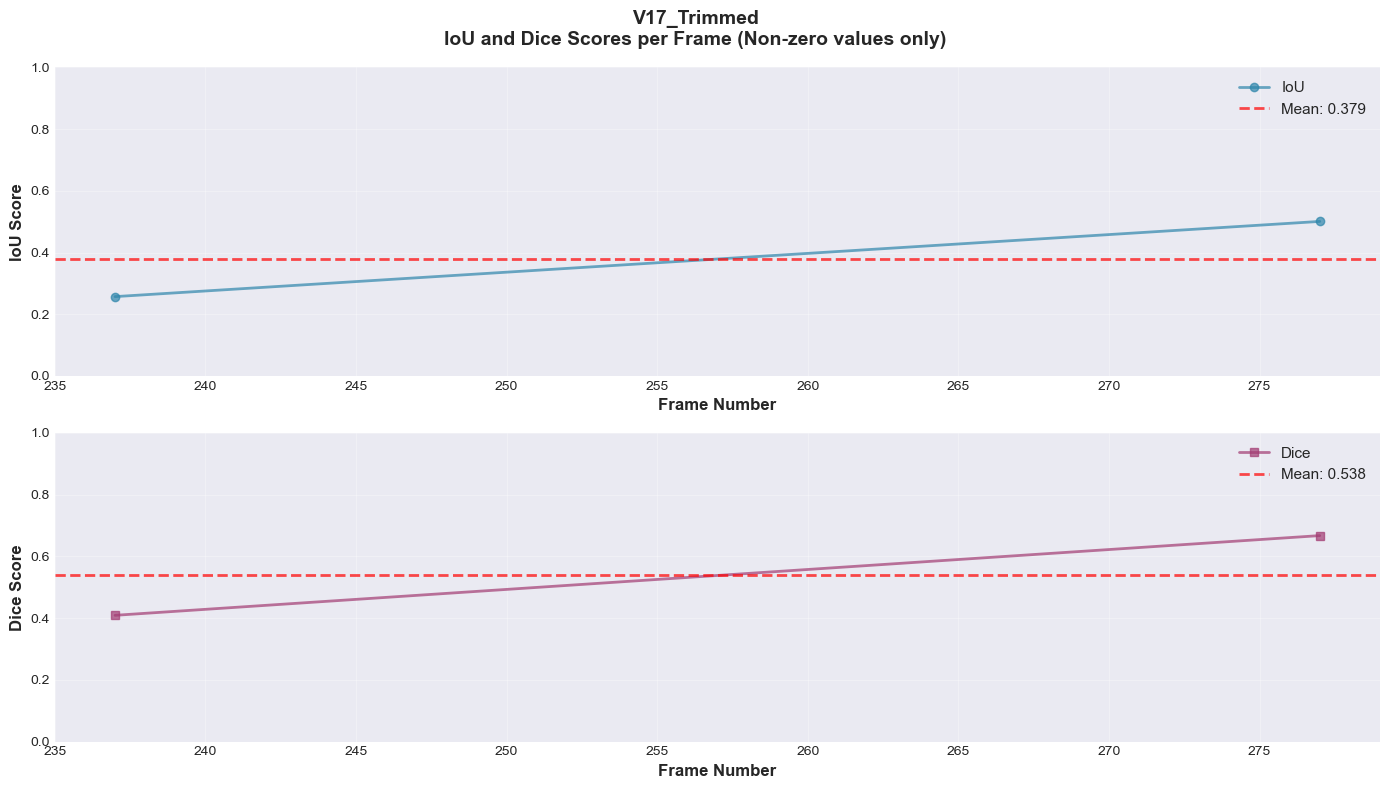

Saved: V18_Trimmed_metrics.png (6 non-zero frames)


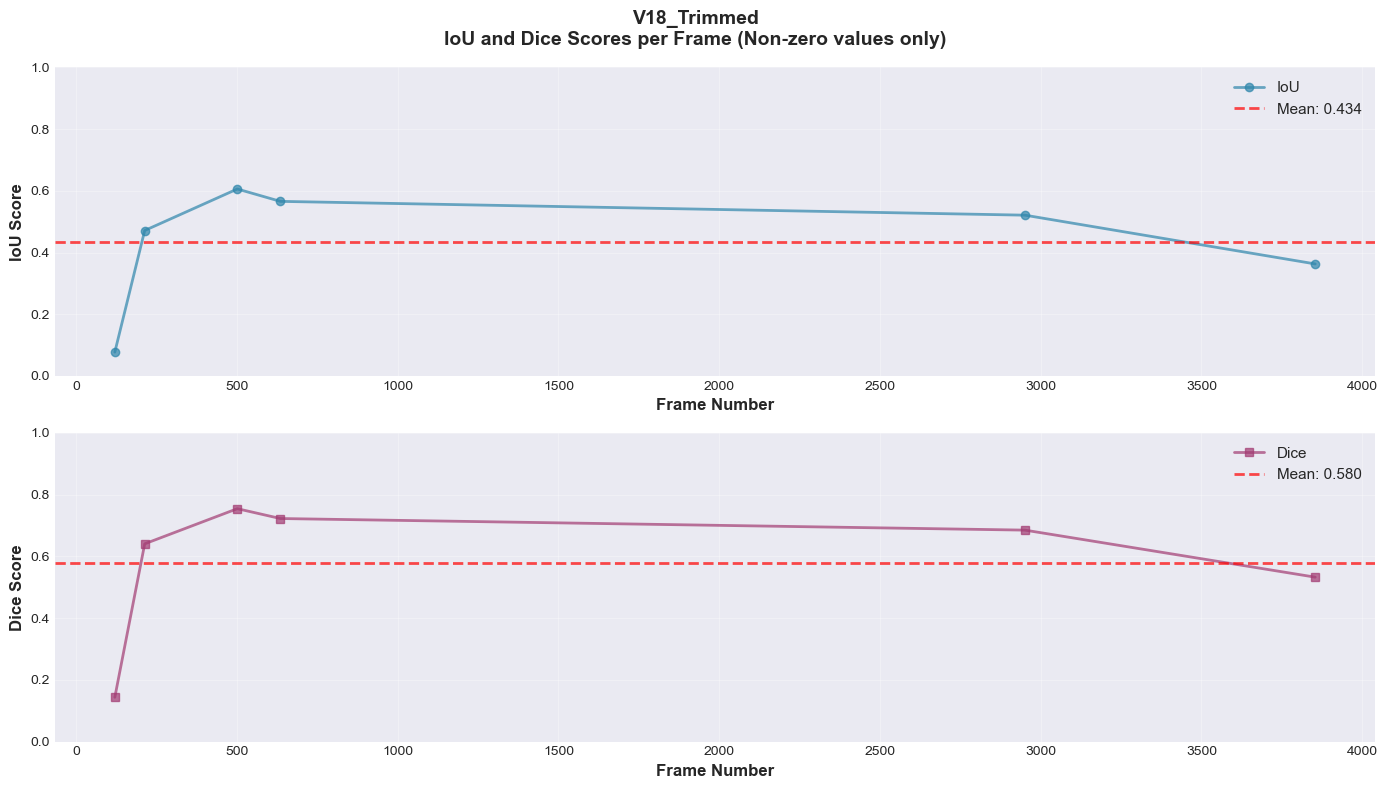

Saved: V2_Trimmed_metrics.png (12 non-zero frames)


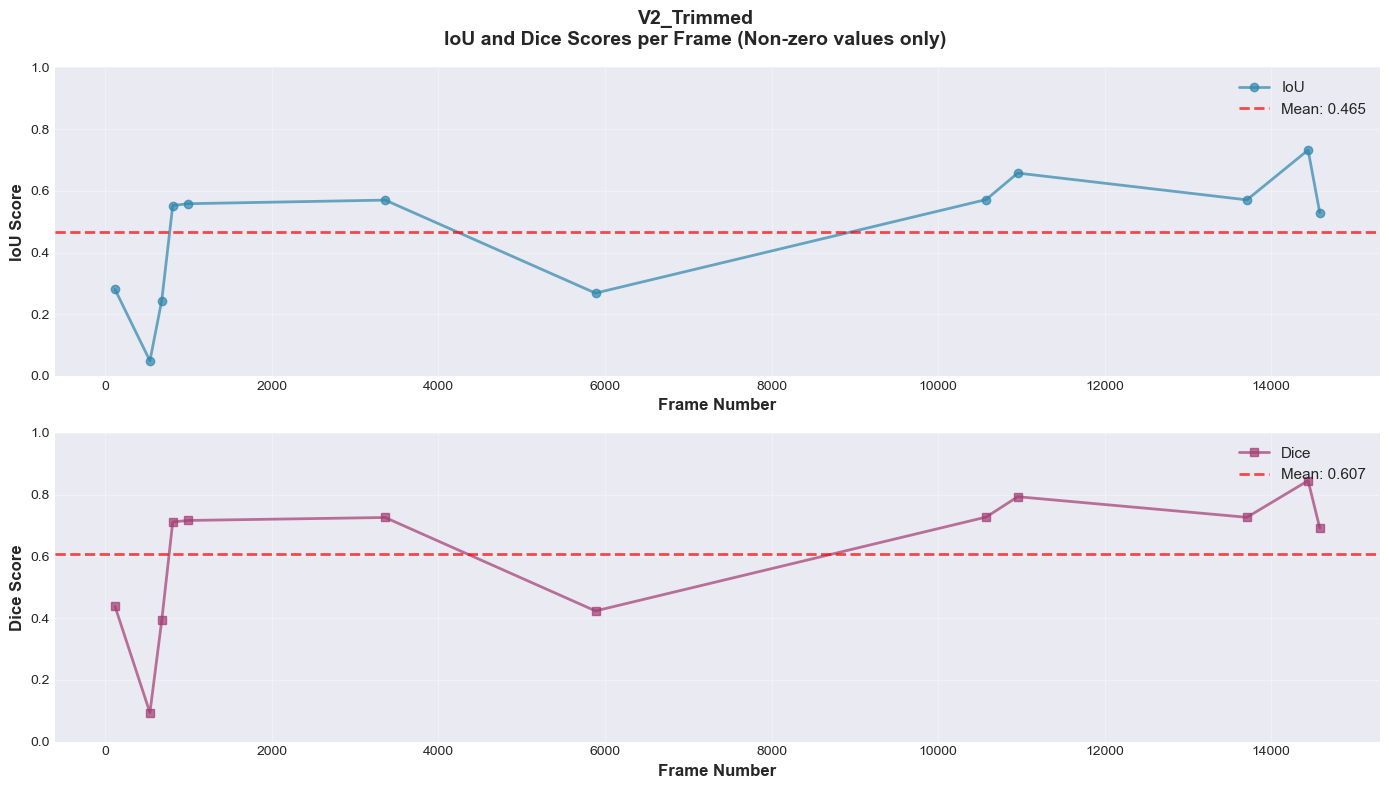

Saved: V5_Trimmed_metrics.png (8 non-zero frames)


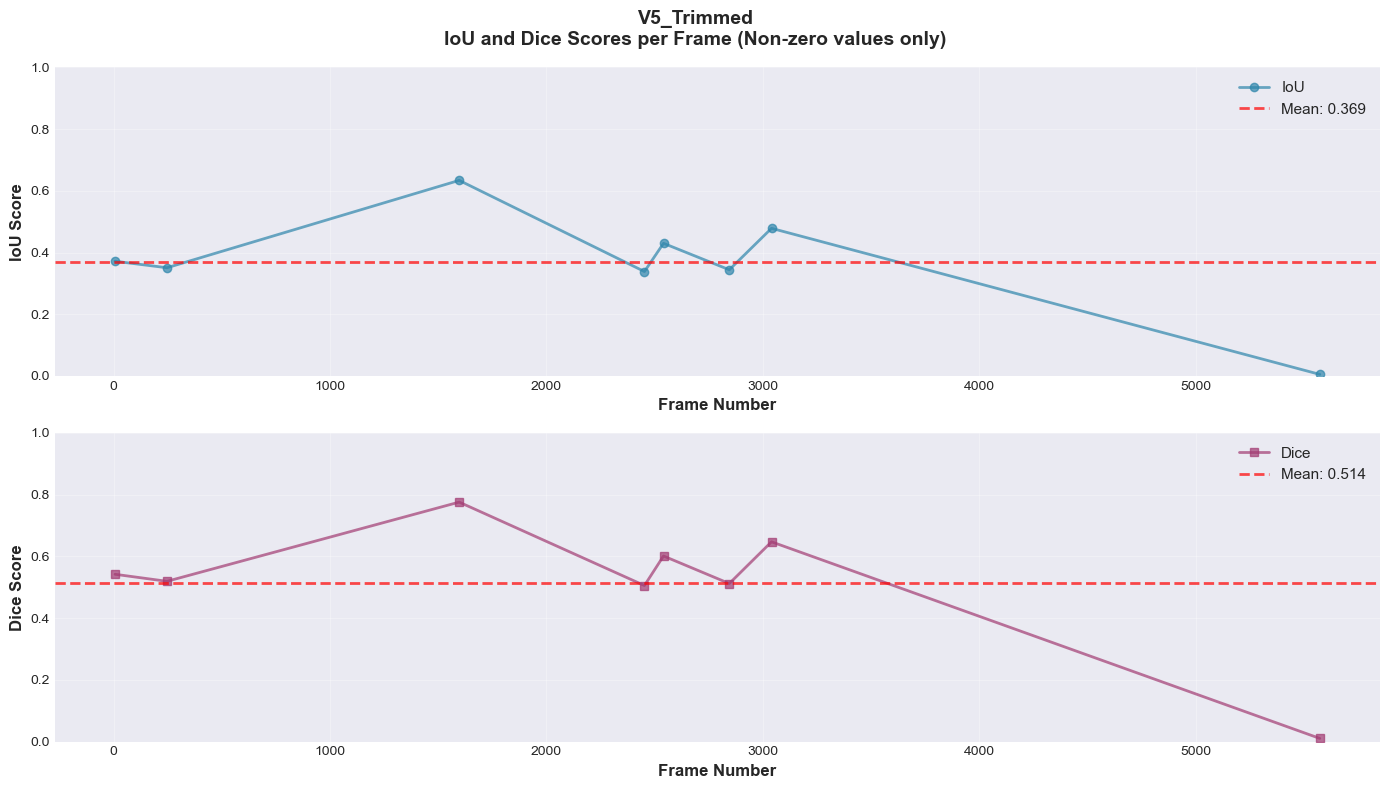

Saved: V7-Trimmed_metrics.png (2 non-zero frames)


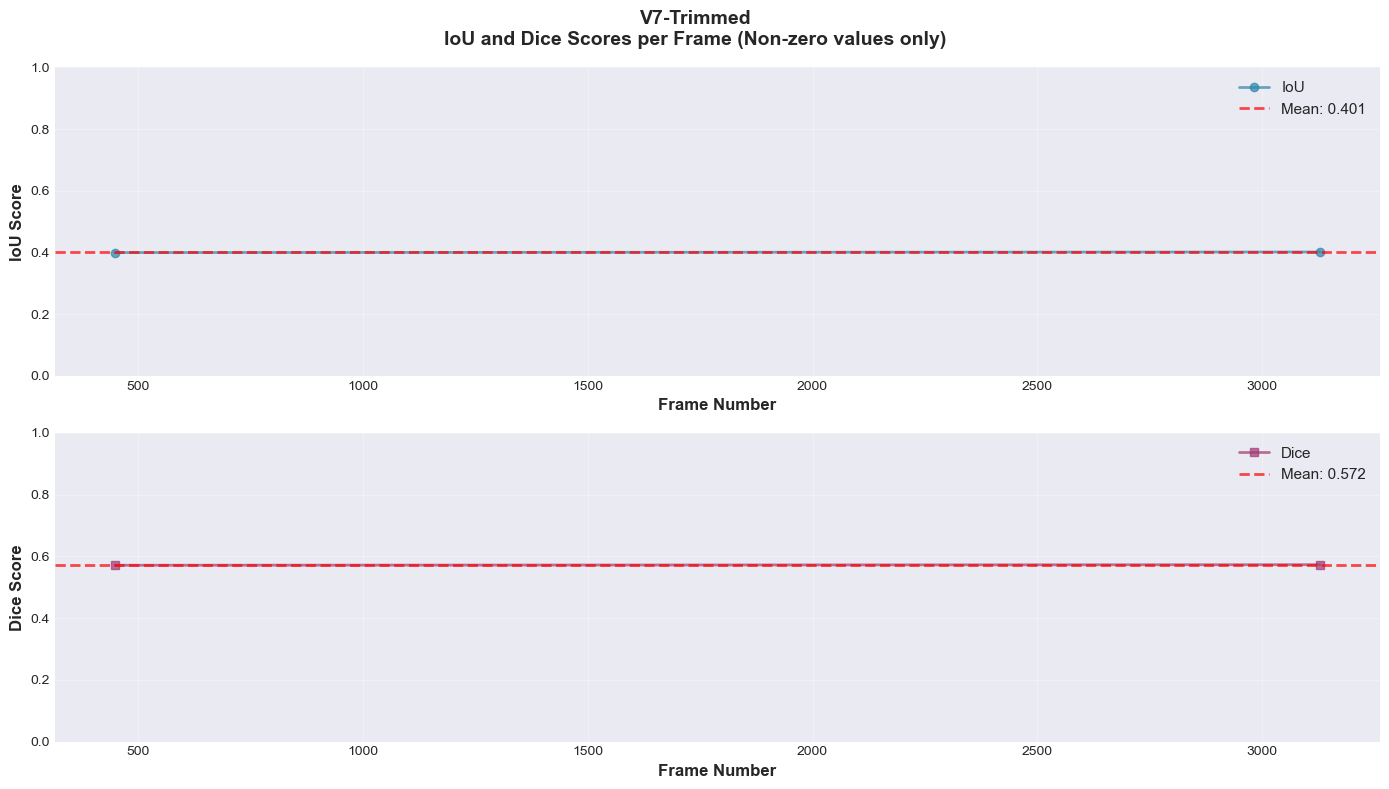

In [18]:
# Create individual plots for each video
for video_name, data in sorted(video_data.items()):
    frames, ious, dices = extract_nonzero_metrics(data)
    
    if len(frames) == 0:
        print(f"Skipping {video_name} - no non-zero values")
        continue
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
    fig.suptitle(f'{video_name}\nIoU and Dice Scores per Frame (Non-zero values only)', 
                 fontsize=14, fontweight='bold')
    
    # IoU plot
    ax1.plot(frames, ious, marker='o', linestyle='-', linewidth=2, 
             markersize=6, color='#2E86AB', alpha=0.7, label='IoU')
    ax1.set_ylabel('IoU Score', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Frame Number', fontsize=12, fontweight='bold')
    ax1.set_ylim([0, 1.0])
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper right', fontsize=11)
    
    # Add mean line
    mean_iou = np.mean(ious)
    ax1.axhline(y=mean_iou, color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {mean_iou:.3f}', alpha=0.7)
    ax1.legend(loc='upper right', fontsize=11)
    
    # Dice plot
    ax2.plot(frames, dices, marker='s', linestyle='-', linewidth=2, 
             markersize=6, color='#A23B72', alpha=0.7, label='Dice')
    ax2.set_ylabel('Dice Score', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Frame Number', fontsize=12, fontweight='bold')
    ax2.set_ylim([0, 1.0])
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='upper right', fontsize=11)
    
    # Add mean line
    mean_dice = np.mean(dices)
    ax2.axhline(y=mean_dice, color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {mean_dice:.3f}', alpha=0.7)
    ax2.legend(loc='upper right', fontsize=11)
    
    plt.tight_layout()
    
    # Save figure
    output_filename = f'{video_name}_metrics.png'
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    print(f"Saved: {output_filename} ({len(frames)} non-zero frames)")
    
    plt.show()

## Overall Summary Plot

Box plots showing the distribution of IoU and Dice scores across all videos.

In [19]:
# Collect all non-zero metrics for overall visualization
all_ious = []
all_dices = []
video_names_for_box = []
ious_by_video = []
dices_by_video = []

for video_name, data in sorted(video_data.items()):
    frames, ious, dices = extract_nonzero_metrics(data)
    
    if len(frames) > 0:
        all_ious.extend(ious)
        all_dices.extend(dices)
        video_names_for_box.append(video_name)
        ious_by_video.append(ious)
        dices_by_video.append(dices)

print(f"Total non-zero IoU values: {len(all_ious)}")
print(f"Total non-zero Dice values: {len(all_dices)}")

Total non-zero IoU values: 356
Total non-zero Dice values: 356


/var/folders/dm/8x90njcn57b_60tc6t8_0px80000gp/T/ipykernel_49264/1510591595.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = ax3.boxplot(ious_by_video, labels=video_names_for_box, patch_artist=True,
/var/folders/dm/8x90njcn57b_60tc6t8_0px80000gp/T/ipykernel_49264/1510591595.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = ax4.boxplot(dices_by_video, labels=video_names_for_box, patch_artist=True,


Saved: overall_iou_dice_summary.png


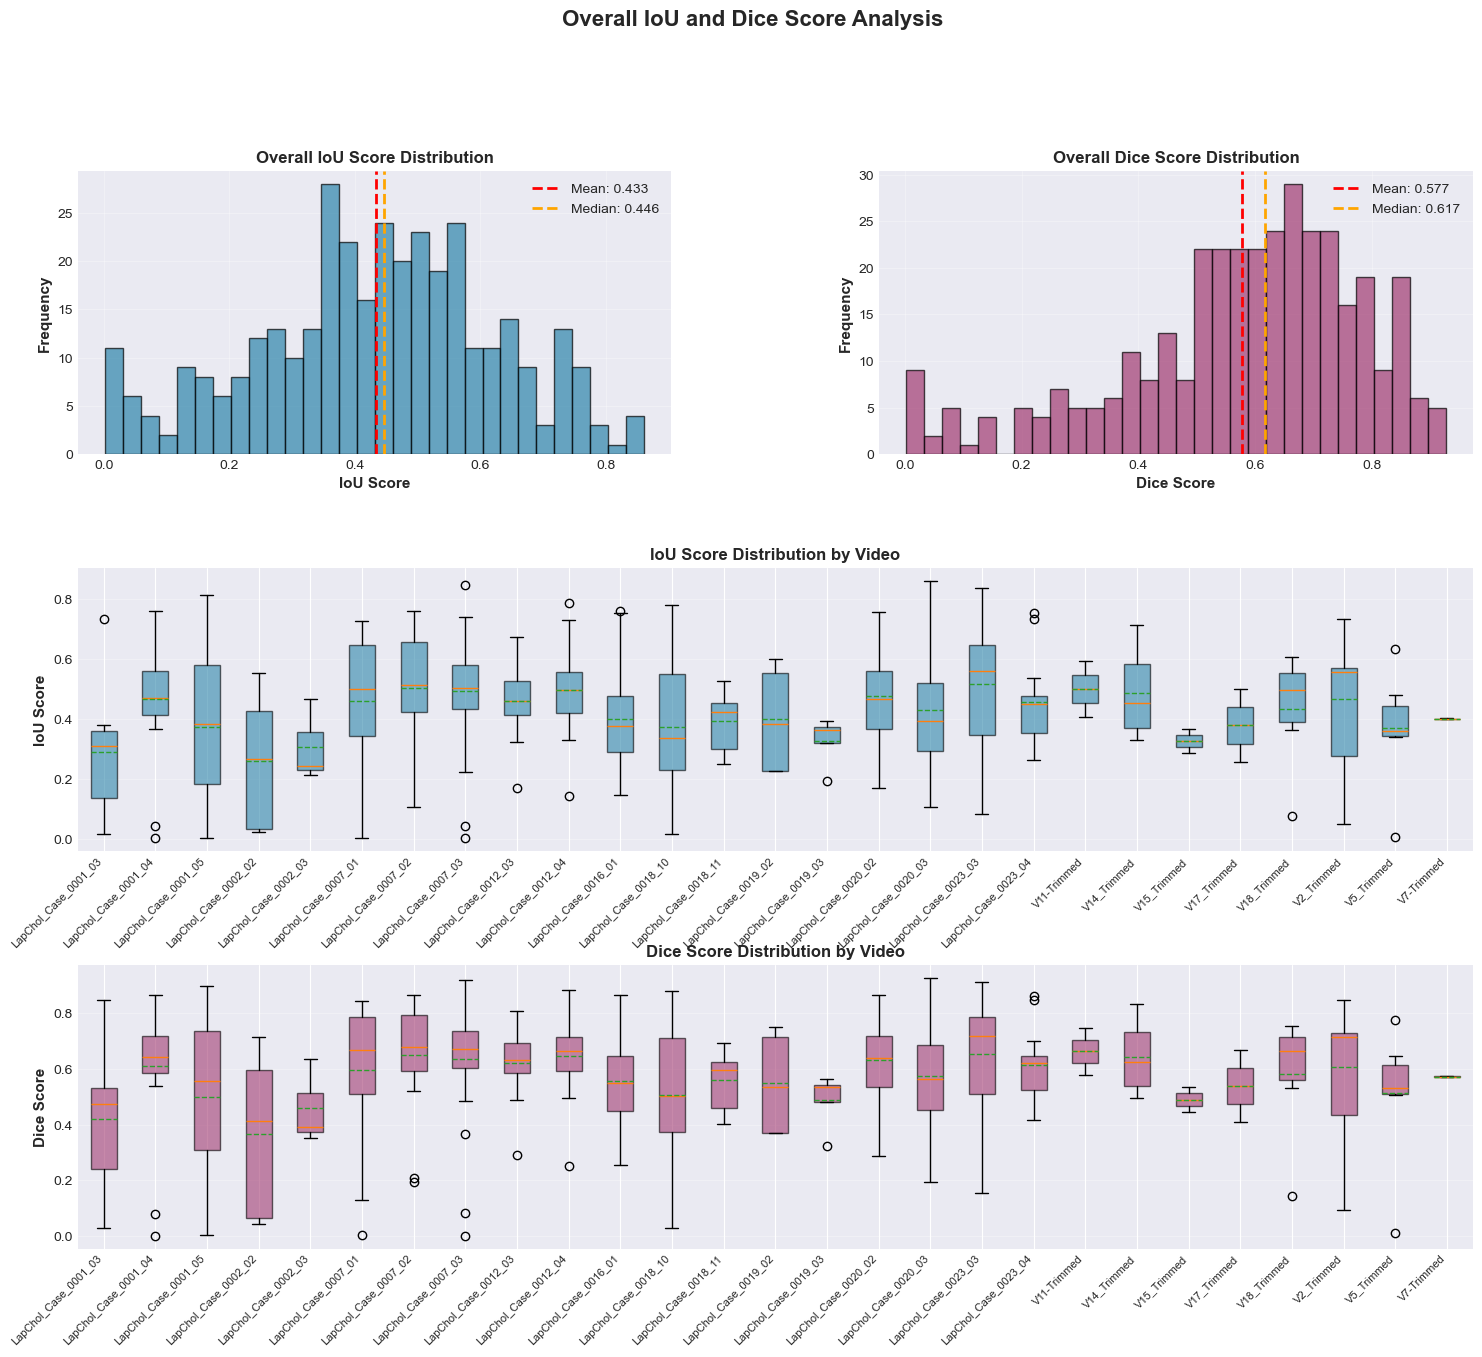

In [20]:
# Create overall summary figure with multiple subplots
fig = plt.figure(figsize=(18, 14))  # 增加高度
gs = fig.add_gridspec(3, 2, hspace=0.6, wspace=0.35)  # 增加间距

# 1. Overall histogram of IoU scores
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(all_ious, bins=30, color='#2E86AB', alpha=0.7, edgecolor='black')
ax1.axvline(np.mean(all_ious), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {np.mean(all_ious):.3f}')
ax1.axvline(np.median(all_ious), color='orange', linestyle='--', linewidth=2, 
            label=f'Median: {np.median(all_ious):.3f}')
ax1.set_xlabel('IoU Score', fontsize=11, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax1.set_title('Overall IoU Score Distribution', 
              fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# 2. Overall histogram of Dice scores
ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(all_dices, bins=30, color='#A23B72', alpha=0.7, edgecolor='black')
ax2.axvline(np.mean(all_dices), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {np.mean(all_dices):.3f}')
ax2.axvline(np.median(all_dices), color='orange', linestyle='--', linewidth=2, 
            label=f'Median: {np.median(all_dices):.3f}')
ax2.set_xlabel('Dice Score', fontsize=11, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax2.set_title('Overall Dice Score Distribution', 
              fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# 3. Box plot of IoU by video
ax3 = fig.add_subplot(gs[1, :])
bp1 = ax3.boxplot(ious_by_video, labels=video_names_for_box, patch_artist=True,
                   showmeans=True, meanline=True)
for patch in bp1['boxes']:
    patch.set_facecolor('#2E86AB')
    patch.set_alpha(0.6)
ax3.set_ylabel('IoU Score', fontsize=11, fontweight='bold')
ax3.set_title('IoU Score Distribution by Video', 
              fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

# 4. Box plot of Dice by video
ax4 = fig.add_subplot(gs[2, :])
bp2 = ax4.boxplot(dices_by_video, labels=video_names_for_box, patch_artist=True,
                   showmeans=True, meanline=True)
for patch in bp2['boxes']:
    patch.set_facecolor('#A23B72')
    patch.set_alpha(0.6)
ax4.set_ylabel('Dice Score', fontsize=11, fontweight='bold')
ax4.set_title('Dice Score Distribution by Video', 
              fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

fig.suptitle('Overall IoU and Dice Score Analysis', fontsize=16, fontweight='bold', y=0.995)

# Save overall figure
plt.savefig('overall_iou_dice_summary.png', dpi=300, bbox_inches='tight')
print("Saved: overall_iou_dice_summary.png")
plt.show()

In [21]:
# Print summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS (Non-zero values only)")
print("="*60)
print(f"\nTotal videos analyzed: {len(video_names_for_box)}")
print(f"Total non-zero frames: {len(all_ious)}")
print(f"\nIoU Scores:")
print(f"  Mean:   {np.mean(all_ious):.4f}")
print(f"  Median: {np.median(all_ious):.4f}")
print(f"  Std:    {np.std(all_ious):.4f}")
print(f"  Min:    {np.min(all_ious):.4f}")
print(f"  Max:    {np.max(all_ious):.4f}")
print(f"\nDice Scores:")
print(f"  Mean:   {np.mean(all_dices):.4f}")
print(f"  Median: {np.median(all_dices):.4f}")
print(f"  Std:    {np.std(all_dices):.4f}")
print(f"  Min:    {np.min(all_dices):.4f}")
print(f"  Max:    {np.max(all_dices):.4f}")
print("\n" + "="*60)

# Per-video statistics
print("\nPer-Video Statistics (Non-zero values):")
print("="*60)
for i, video_name in enumerate(video_names_for_box):
    print(f"\n{video_name}:")
    print(f"  Non-zero frames: {len(ious_by_video[i])}")
    print(f"  IoU  - Mean: {np.mean(ious_by_video[i]):.4f}, Median: {np.median(ious_by_video[i]):.4f}")
    print(f"  Dice - Mean: {np.mean(dices_by_video[i]):.4f}, Median: {np.median(dices_by_video[i]):.4f}")


SUMMARY STATISTICS (Non-zero values only)

Total videos analyzed: 27
Total non-zero frames: 356

IoU Scores:
  Mean:   0.4331
  Median: 0.4458
  Std:    0.1918
  Min:    0.0013
  Max:    0.8617

Dice Scores:
  Mean:   0.5773
  Median: 0.6167
  Std:    0.2056
  Min:    0.0026
  Max:    0.9257


Per-Video Statistics (Non-zero values):

LapChol_Case_0001_03:
  Non-zero frames: 11
  IoU  - Mean: 0.2891, Median: 0.3111
  Dice - Mean: 0.4193, Median: 0.4746

LapChol_Case_0001_04:
  Non-zero frames: 19
  IoU  - Mean: 0.4651, Median: 0.4714
  Dice - Mean: 0.6091, Median: 0.6407

LapChol_Case_0001_05:
  Non-zero frames: 35
  IoU  - Mean: 0.3748, Median: 0.3838
  Dice - Mean: 0.4999, Median: 0.5547

LapChol_Case_0002_02:
  Non-zero frames: 8
  IoU  - Mean: 0.2587, Median: 0.2677
  Dice - Mean: 0.3677, Median: 0.4147

LapChol_Case_0002_03:
  Non-zero frames: 3
  IoU  - Mean: 0.3079, Median: 0.2448
  Dice - Mean: 0.4600, Median: 0.3933

LapChol_Case_0007_01:
  Non-zero frames: 20
  IoU  - Mean: 0